<a href="https://colab.research.google.com/github/KennyOlat/kennyOlat/blob/main/lung_cancer_prediction2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Aim**

The aim of the study is to assist the medical practitioners to classify a patient as having lung cancer or not employing provided medical dataset using various Machine Learning Algorithms

#**Work Flow**

The following is the phases of the research

Data Acquisition -> Data Preprocessing -> Explorative Data Analysis -> Model Building -> Classification -> Evaluation -> Hyperparameter Tuning

**Implementation**

this was carried out in python environment

necessary libraries were imported

In [ ]:
#importing required library

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from IPython.display import display

#**Data Acquisition**

Data used in this study is acquired from a public repository Kaggle (https://www.kaggle.com/datasets/mysarahmadbhat/lung-cancer).

The dataset comprises of 16 features and 309 values.

Gender: M(male), F(female)

Age: Age of the patient

Smoking: YES=2 , NO=1.

Yellow fingers: YES=2 , NO=1.

Anxiety: YES=2 , NO=1.

Peer_pressure: YES=2 , NO=1.

Chronic Disease: YES=2 , NO=1.

Fatigue: YES=2 , NO=1.

Allergy: YES=2 , NO=1.

Wheezing: YES=2 , NO=1.

Alcohol: YES=2 , NO=1.

Coughing: YES=2 , NO=1.

Shortness of Breath: YES=2 , NO=1.

Swallowing Difficulty: YES=2 , NO=1.

Chest pain: YES=2 , NO=1.

Lung Cancer: YES , NO.



In [ ]:
lungc = pd.read_csv('/content/survey lung cancer.csv')

In [ ]:
#previewing the dataset
lungc.head()

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                    2                      2           2         YES  
1                    2                      2           2         YES  
2                    2                      1           2          NO  
3                    1                      2           2          NO  
4                    2                      1           1          NO

In [ ]:
#checking the rows and columns of the dataset
lungc.shape

(309, 16)

In [ ]:
#checking the datatype and null values of the dataset
lungc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 309 non-null    object
 1   AGE                    309 non-null    int64 
 2   SMOKING                309 non-null    int64 
 3   YELLOW_FINGERS         309 non-null    int64 
 4   ANXIETY                309 non-null    int64 
 5   PEER_PRESSURE          309 non-null    int64 
 6   CHRONIC DISEASE        309 non-null    int64 
 7   FATIGUE                309 non-null    int64 
 8   ALLERGY                309 non-null    int64 
 9   WHEEZING               309 non-null    int64 
 10  ALCOHOL CONSUMING      309 non-null    int64 
 11  COUGHING               309 non-null    int64 
 12  SHORTNESS OF BREATH    309 non-null    int64 
 13  SWALLOWING DIFFICULTY  309 non-null    int64 
 14  CHEST PAIN             309 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
#checking the statistical distribution of the dataset
lungc.describe()

AGE     SMOKING  YELLOW_FINGERS     ANXIETY  PEER_PRESSURE  \
count  309.000000  309.000000      309.000000  309.000000     309.000000   
mean    62.673139    1.563107        1.569579    1.498382       1.501618   
std      8.210301    0.496806        0.495938    0.500808       0.500808   
min     21.000000    1.000000        1.000000    1.000000       1.000000   
25%     57.000000    1.000000        1.000000    1.000000       1.000000   
50%     62.000000    2.000000        2.000000    1.000000       2.000000   
75%     69.000000    2.000000        2.000000    2.000000       2.000000   
max     87.000000    2.000000        2.000000    2.000000       2.000000   

       CHRONIC DISEASE    FATIGUE     ALLERGY     WHEEZING  ALCOHOL CONSUMING  \
count       309.000000  309.000000  309.000000  309.000000         309.000000   
mean          1.504854    1.673139    1.556634    1.556634           1.556634   
std           0.500787    0.469827    0.497588    0.497588           0.497588   
min           1.000000    1.000000    1.000000    1.000000           1.000000   
25%           1.000000    1.000000    1.000000    1.000000           1.000000   
50%           2.000000    2.000000    2.000000    2.000000           2.000000   
75%           2.000000    2.000000    2.000000    2.000000           2.000000   
max           2.000000    2.000000    2.000000    2.000000           2.000000   

         COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
count  309.000000           309.000000             309.000000  309.000000  
mean     1.579288             1.640777               1.469256    1.556634  
std      0.494474             0.480551               0.499863    0.497588  
min      1.000000             1.000000               1.000000    1.000000  
25%      1.000000             1.000000               1.000000    1.000000  
50%      2.000000             2.000000               1.000000    2.000000  
75%      2.000000             2.000000               2.000000    2.000000  
max      2.000000             2.000000               2.000000    2.000000

In [ ]:
lungc.duplicated().sum()

33

In [ ]:
lungc = lungc.drop_duplicates()

In [ ]:
#reviewing the null values
lungc.isnull().sum()

GENDER                   0
AGE                      0
SMOKING                  0
YELLOW_FINGERS           0
ANXIETY                  0
PEER_PRESSURE            0
CHRONIC DISEASE          0
FATIGUE                  0
ALLERGY                  0
WHEEZING                 0
ALCOHOL CONSUMING        0
COUGHING                 0
SHORTNESS OF BREATH      0
SWALLOWING DIFFICULTY    0
CHEST PAIN               0
LUNG_CANCER              0
dtype: int64

In [ ]:
#cheking information after duplicate values are removed
lungc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 276 entries, 0 to 283
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   GENDER                 276 non-null    object
 1   AGE                    276 non-null    int64 
 2   SMOKING                276 non-null    int64 
 3   YELLOW_FINGERS         276 non-null    int64 
 4   ANXIETY                276 non-null    int64 
 5   PEER_PRESSURE          276 non-null    int64 
 6   CHRONIC DISEASE        276 non-null    int64 
 7   FATIGUE                276 non-null    int64 
 8   ALLERGY                276 non-null    int64 
 9   WHEEZING               276 non-null    int64 
 10  ALCOHOL CONSUMING      276 non-null    int64 
 11  COUGHING               276 non-null    int64 
 12  SHORTNESS OF BREATH    276 non-null    int64 
 13  SWALLOWING DIFFICULTY  276 non-null    int64 
 14  CHEST PAIN             276 non-null    int64 
 15  LUNG_CANCER            

In [ ]:
# conversion of categorical variables using label encoder

from sklearn import preprocessing
le=preprocessing.LabelEncoder()

In [ ]:
lungc['GENDER']=le.fit_transform(lungc['GENDER'])
lungc['LUNG_CANCER']=le.fit_transform(lungc['LUNG_CANCER'])


In [ ]:
#previewing the dataset after label encoding
lungc

GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0         1   69        1               2        2              1   
1         1   74        2               1        1              1   
2         0   59        1               1        1              2   
3         1   63        2               2        2              1   
4         0   63        1               2        1              1   
..      ...  ...      ...             ...      ...            ...   
279       0   59        1               2        2              2   
280       0   59        2               1        1              1   
281       1   55        2               1        1              1   
282       1   46        1               2        2              1   
283       1   60        1               2        2              1   

     CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  \
0                  1         2         1         2                  2   
1                  2         2         2         1                  1   
2                  1         2         1         2                  1   
3                  1         1         1         1                  2   
4                  1         1         1         2                  1   
..               ...       ...       ...       ...                ...   
279                1         1         2         2                  1   
280                2         2         2         1                  1   
281                1         2         2         1                  1   
282                1         1         1         1                  1   
283                1         2         1         2                  2   

     COUGHING  SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  \
0           2                    2                      2           2   
1           1                    2                      2           2   
2           2                    2                      1           2   
3           1                    1                      2           2   
4           2                    2                      1           1   
..        ...                  ...                    ...         ...   
279         2                    1                      2           1   
280         1                    2                      1           1   
281         1                    2                      1           2   
282         1                    1                      2           2   
283         2                    2                      2           2   

     LUNG_CANCER  
0              1  
1              1  
2              0  
3              0  
4              0  
..           ...  
279            1  
280            0  
281            0  
282            0  
283            1  

[276 rows x 16 columns]

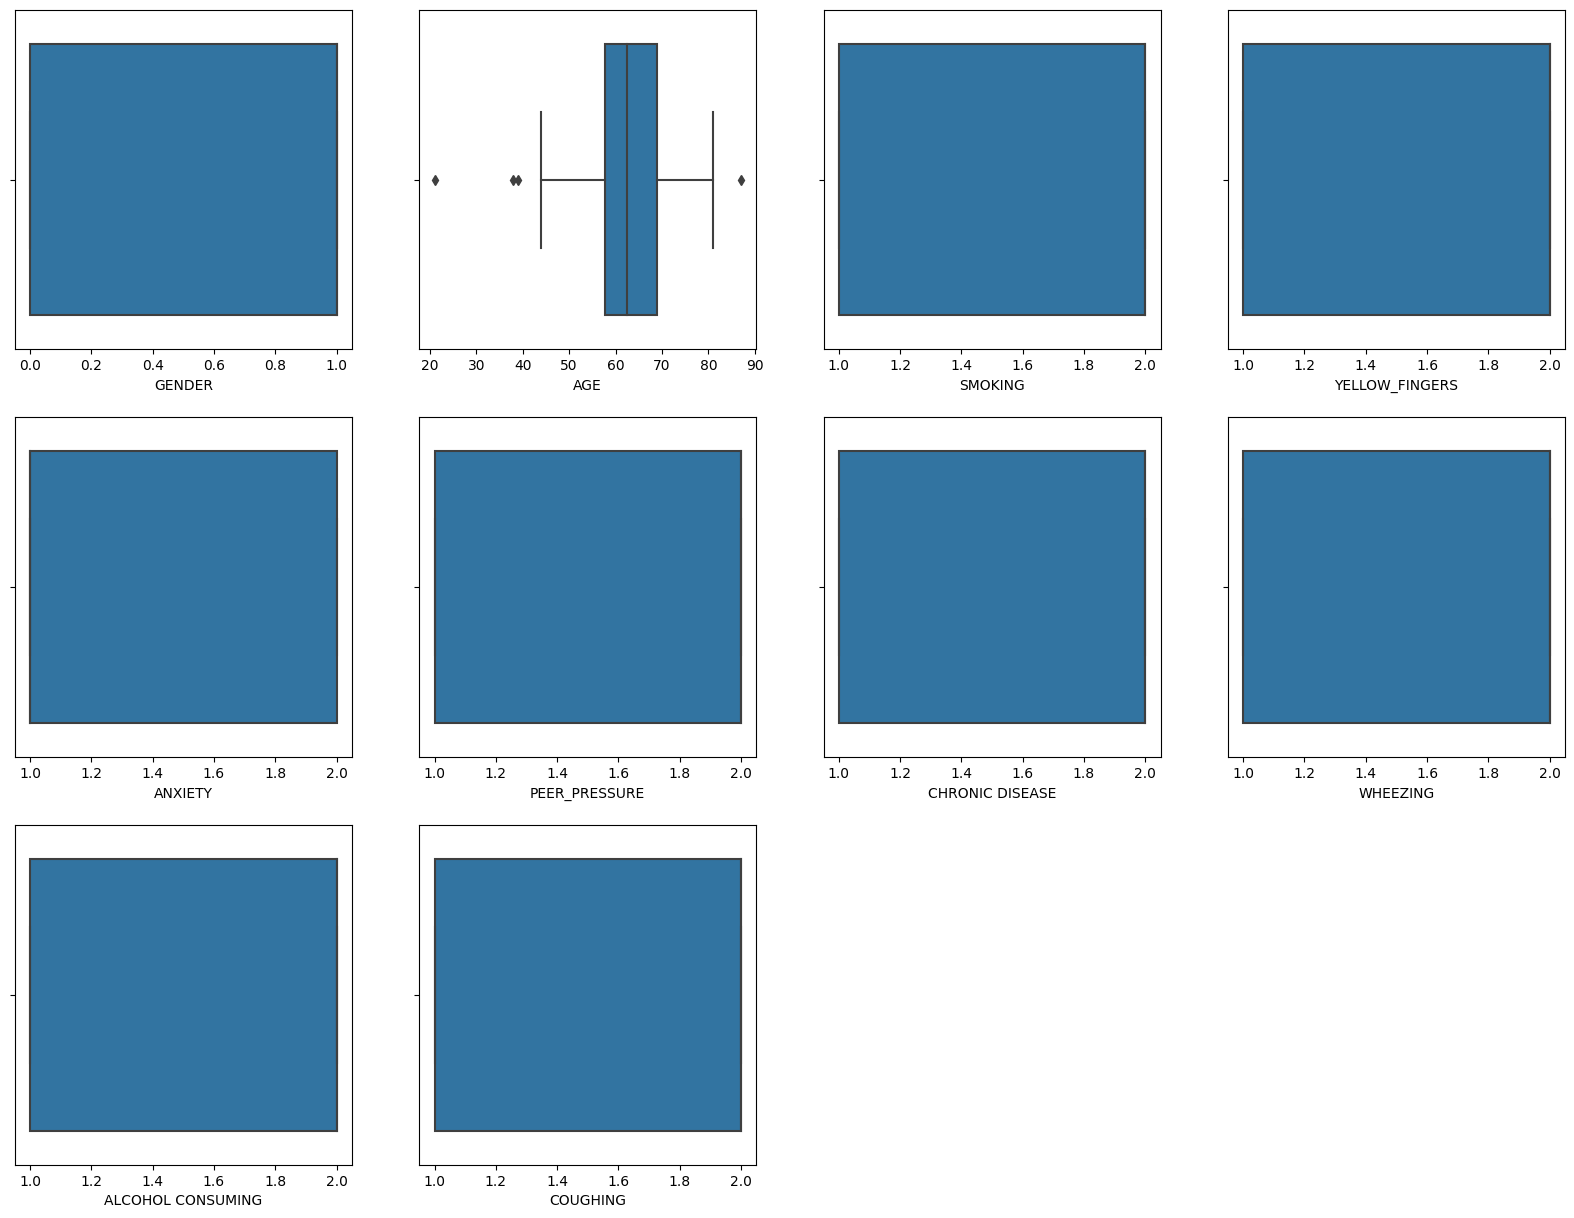

In [ ]:
#let us check for outliers

plt.figure(figsize=(20,15))

plt.subplot(3,4,1)
ax = sns.boxplot(data = lungc, x = 'GENDER')

plt.subplot(3,4,2)
ax = sns.boxplot(data = lungc, x = 'AGE')

plt.subplot(3,4,3)
ax = sns.boxplot(data = lungc, x = 'SMOKING')

plt.subplot(3,4,4)
ax = sns.boxplot(data =lungc, x = 'YELLOW_FINGERS')

plt.subplot(3,4,5)
ax = sns.boxplot(data = lungc, x = 'ANXIETY')

plt.subplot(3,4,6)
ax = sns.boxplot(data = lungc, x = 'PEER_PRESSURE')

plt.subplot(3,4,7)
ax = sns.boxplot(data = lungc, x = 'CHRONIC DISEASE')

plt.subplot(3,4,8)
ax = sns.boxplot(data = lungc, x = 'WHEEZING')

plt.subplot(3,4,9)
ax = sns.boxplot(data =lungc, x = 'ALCOHOL CONSUMING')

plt.subplot(3,4,10)
ax = sns.boxplot(data = lungc, x = 'COUGHING')


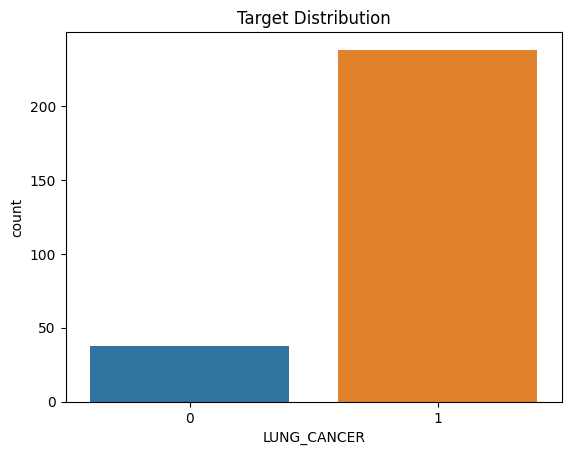

In [ ]:
#checking the distribution of target variables
sns.countplot(x='LUNG_CANCER', data=lungc,)
plt.title('Target Distribution');

The target variables are between Yes and No for lung cancer is imbalance which might affect the predictive result. therefore this imbalance will be addressed using a method called SMOTE

In [ ]:
#getting the distribution for target distribution
lungc['LUNG_CANCER'].value_counts()

1    238
0     38
Name: LUNG_CANCER, dtype: int64

In [ ]:
#accessing the FATIGUE columns
lungc.iloc[:,7]

0      2
1      2
2      2
3      1
4      1
      ..
279    1
280    2
281    2
282    1
283    2
Name: FATIGUE , Length: 276, dtype: int64

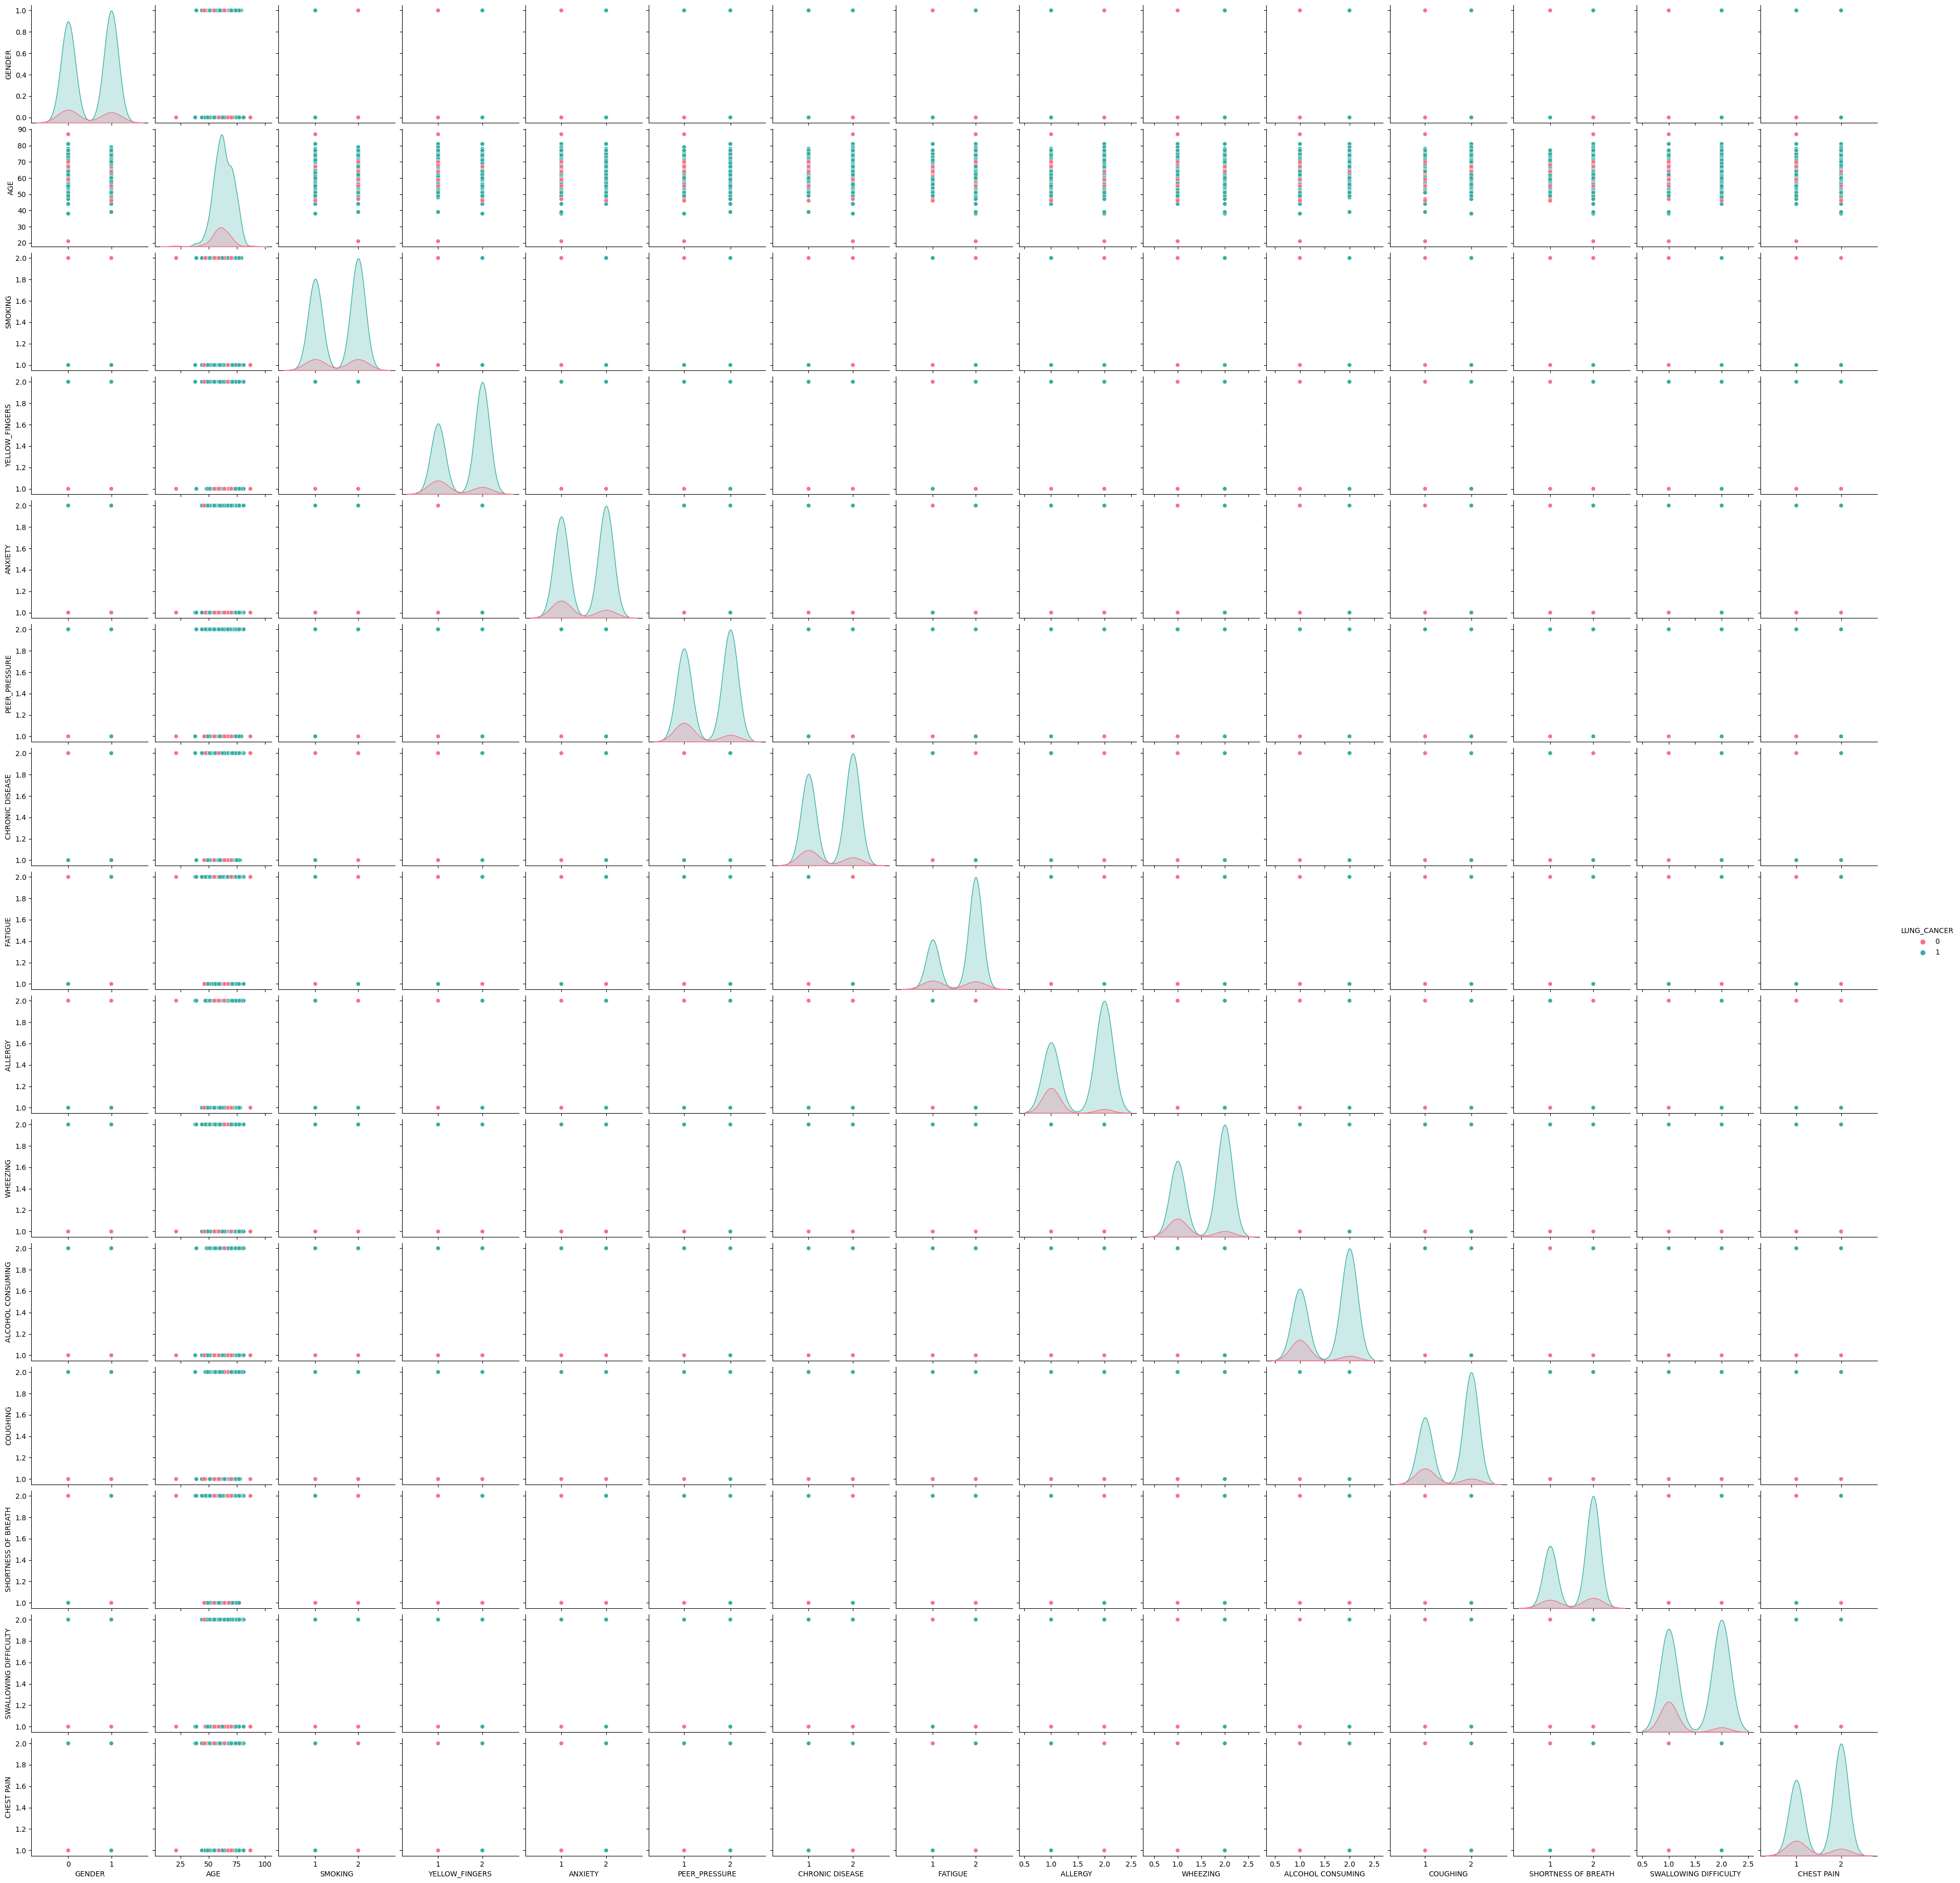

In [ ]:
#checking the relationship between variables
sns.pairplot(lungc, hue='LUNG_CANCER', palette="husl")

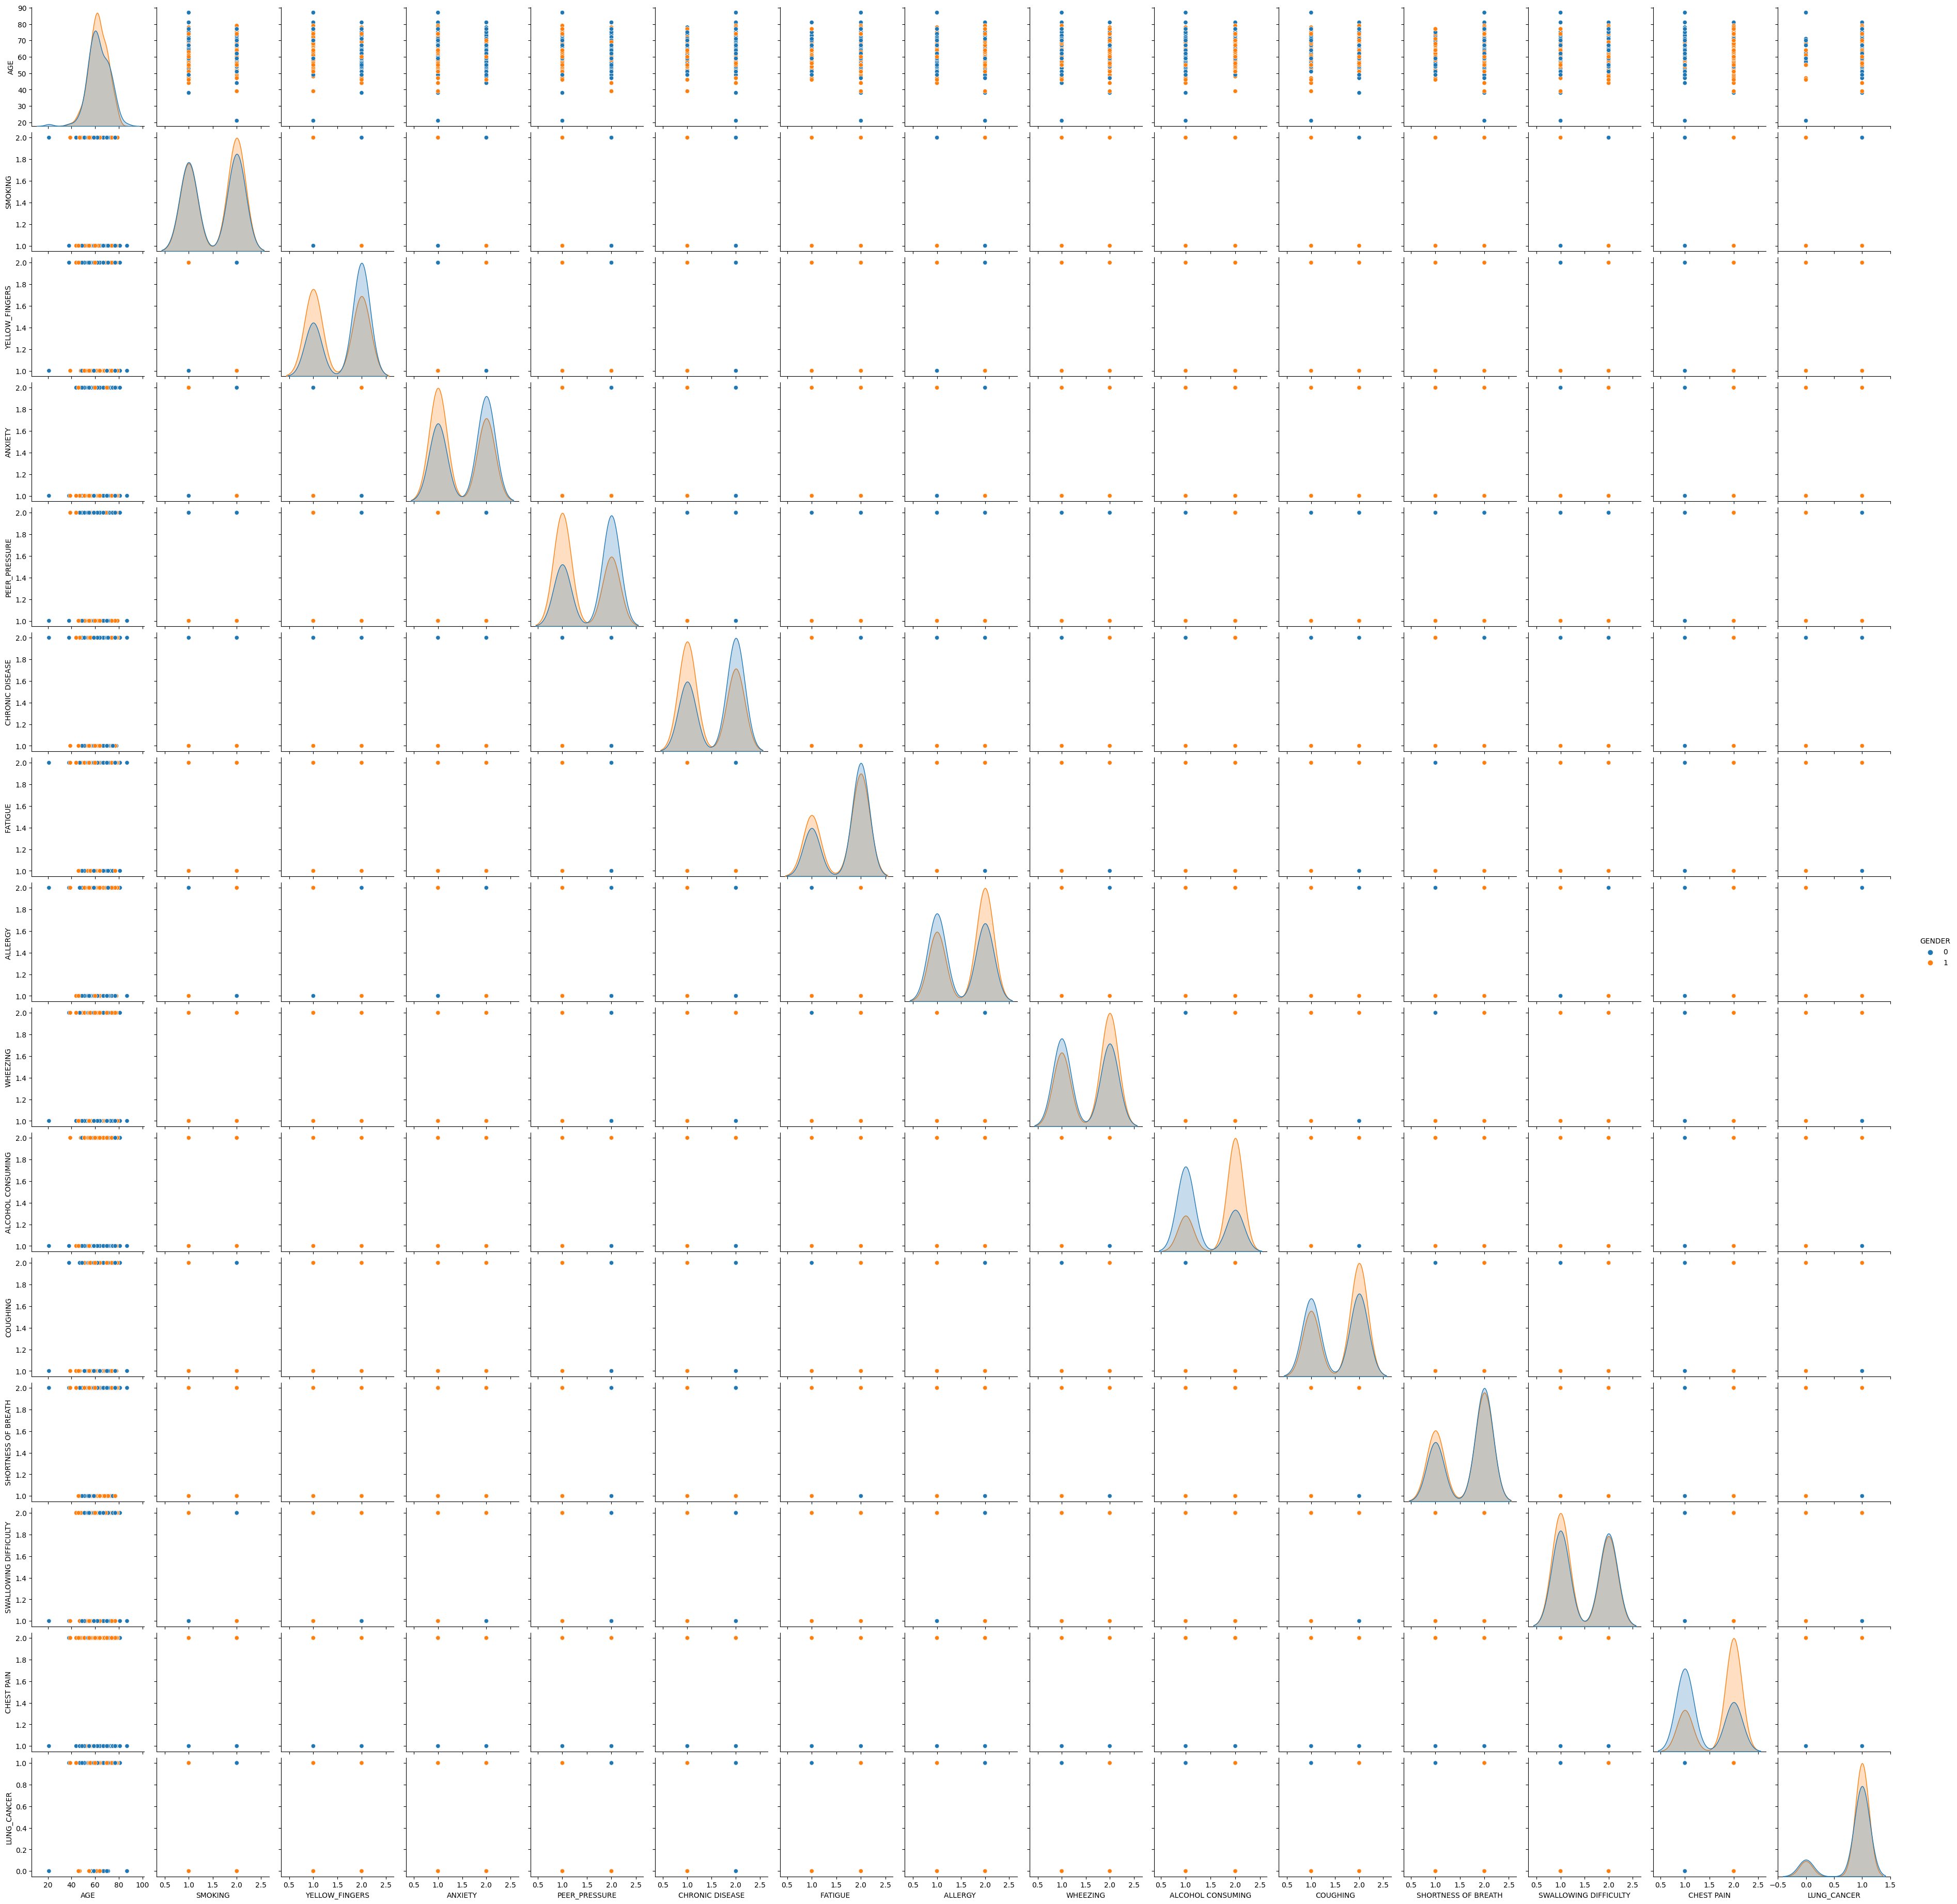

In [ ]:
# to visualize our data, we can also perform bivariate analysis

sns.pairplot(lungc, hue='GENDER')

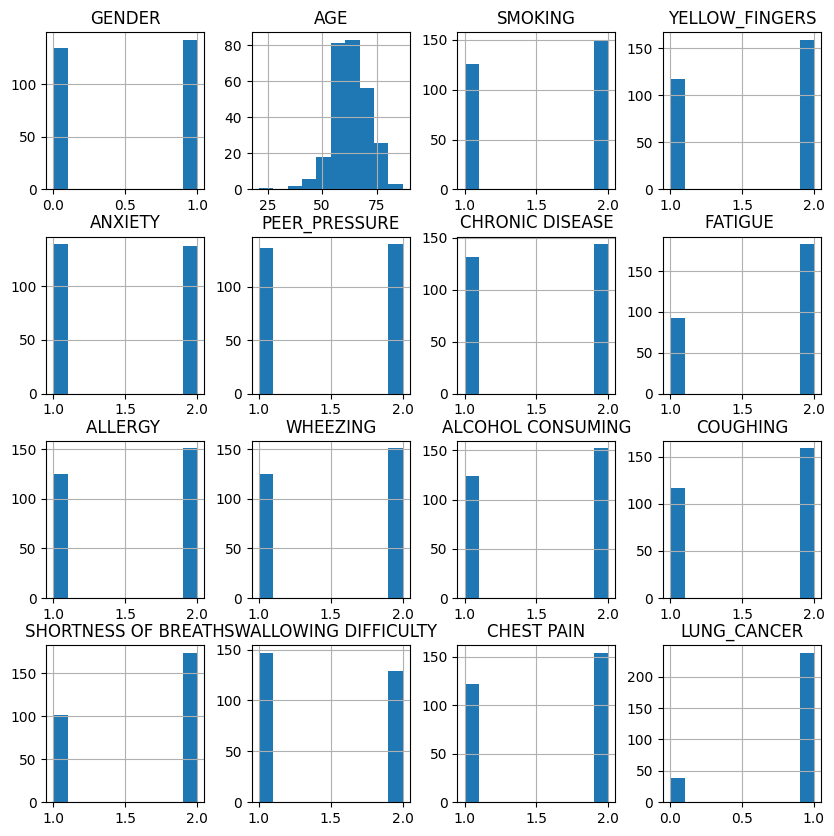

In [ ]:
# display numerical feature distribution
dfnum=lungc.hist(figsize=(10,10))

In [ ]:
#creating correlation report
!pip install dataprep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 52.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 57.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 14.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 60.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 54.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 60.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 41.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 86.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 66.2 MB/s eta 0:00:00
  Created wheel for sqlalchemy: filename=SQLAlchemy-1.3.24-cp310-cp310-linux_x86_64.whl size=1252700 sha256=610333e53

Computing apply-4f091dd5e038a89008ee0ef4010b2c75:   0%|          | 0/1589 [00:00<?, ?it/s]/usr/local/lib/python3.10/dist-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in divide
  return func(*(_execute_task(a, cache) for a in args))


My Report
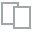
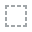
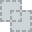
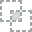
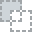
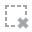
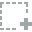
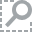
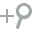
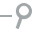
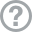
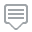
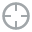
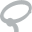
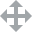
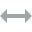
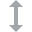
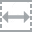
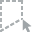
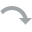
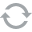
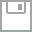
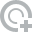
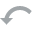
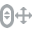
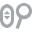
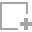
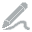
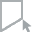
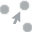
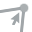
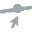

In [ ]:
from dataprep.eda import create_report
report = create_report(lungc, title='My Report')
report

<Axes: xlabel='AGE', ylabel='LUNG_CANCER'>

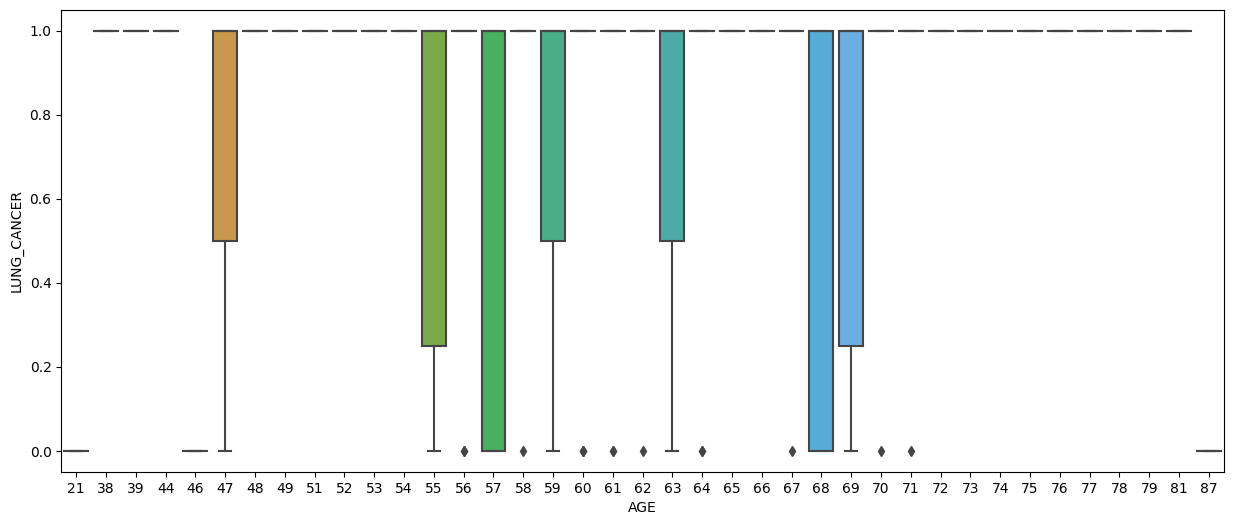

In [ ]:
#checking whether age has anything to do with lung cancer
plt.figure(figsize=(15, 6))
sns.boxplot(x=lungc['AGE'],
              y=lungc['LUNG_CANCER'])

<Axes: xlabel='SMOKING', ylabel='count'>

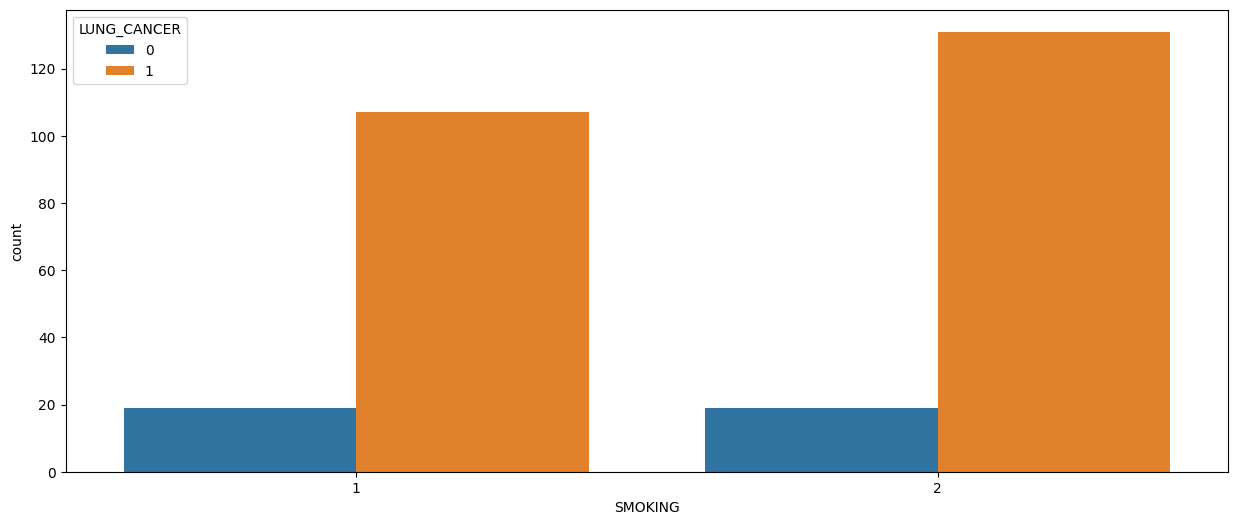

In [ ]:
#checking whether smoking has anything to do with lung cancer
plt.figure(figsize=(15, 6))
sns.countplot(x=lungc['SMOKING'],
              hue=lungc['LUNG_CANCER'])

<Axes: xlabel='ALCOHOL CONSUMING', ylabel='count'>

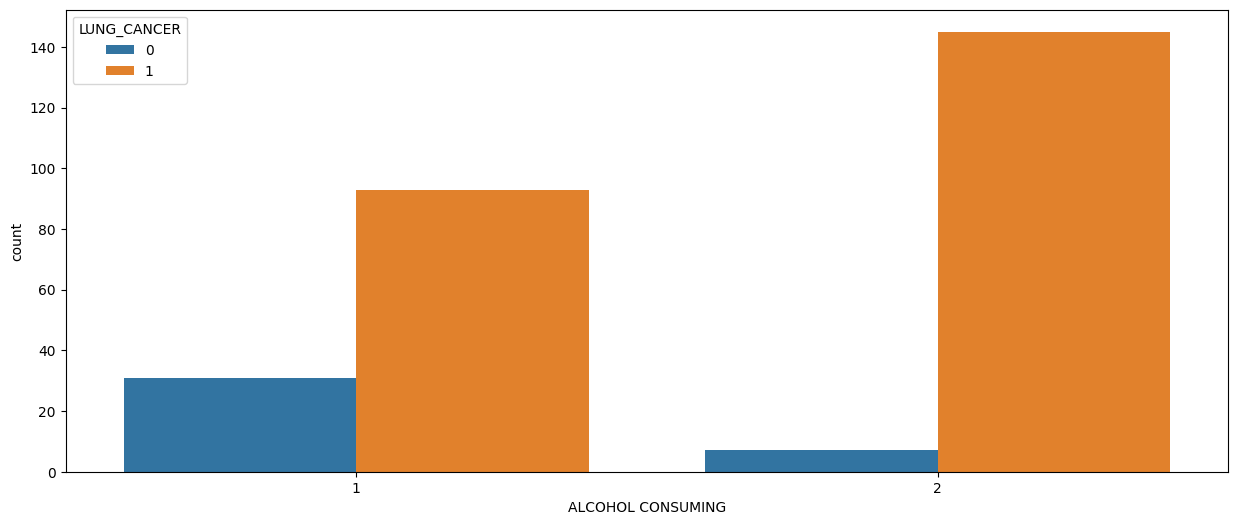

In [ ]:
#checking whether alcohol consumption has anything to do with lung cancer
plt.figure(figsize=(15, 6))
sns.countplot(x=lungc['ALCOHOL CONSUMING'],
              hue=lungc['LUNG_CANCER'])

<Axes: xlabel='ANXIETY', ylabel='count'>

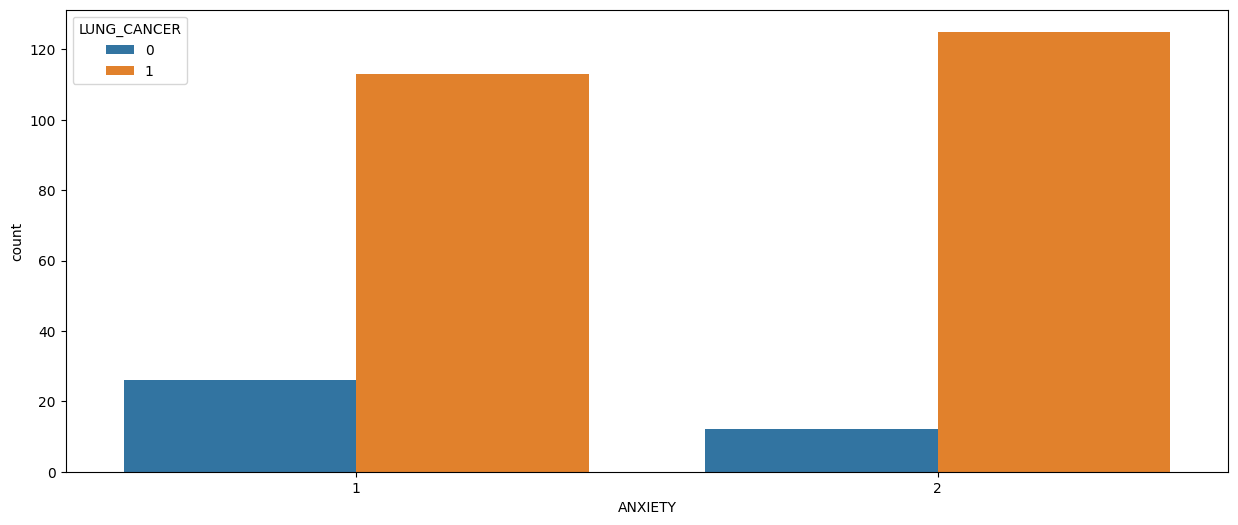

In [ ]:
#checking whether anxiety has anything to do with lung cancer
plt.figure(figsize=(15, 6))
sns.countplot(x=lungc['ANXIETY'],
              hue=lungc['LUNG_CANCER'])

<Axes: xlabel='YELLOW_FINGERS', ylabel='count'>

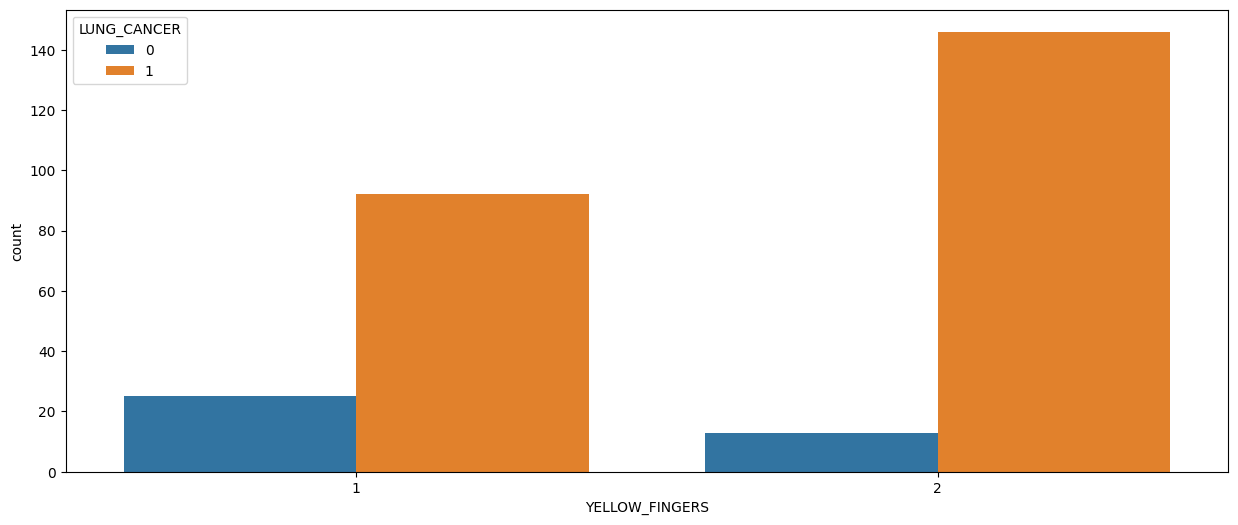

In [ ]:
#checking whether YELLOW FINGERS has anything to do with lung cancer
plt.figure(figsize=(15, 6))
sns.countplot(x=lungc['YELLOW_FINGERS'],
              hue=lungc['LUNG_CANCER'])

In [ ]:
#separating the target variables and other features
X = lungc.drop('LUNG_CANCER', axis=1)
Y = lungc['LUNG_CANCER']

In [ ]:
#finding the correlation

corr=X.corr()
corr

GENDER       AGE   SMOKING  YELLOW_FINGERS   ANXIETY  \
GENDER                 1.000000 -0.013120  0.041131       -0.202506 -0.152032   
AGE                   -0.013120  1.000000 -0.073410        0.025773  0.050605   
SMOKING                0.041131 -0.073410  1.000000       -0.020799  0.153389   
YELLOW_FINGERS        -0.202506  0.025773 -0.020799        1.000000  0.558344   
ANXIETY               -0.152032  0.050605  0.153389        0.558344  1.000000   
PEER_PRESSURE         -0.261427  0.037848 -0.030364        0.313067  0.210278   
CHRONIC DISEASE       -0.189925 -0.003431 -0.149415        0.015316 -0.006938   
FATIGUE               -0.079020  0.021606 -0.037803       -0.099644 -0.181474   
ALLERGY                0.150174  0.037139 -0.030179       -0.147130 -0.159451   
WHEEZING               0.121047  0.052803 -0.147081       -0.058756 -0.174009   
ALCOHOL CONSUMING      0.434264  0.052049 -0.052771       -0.273643 -0.152228   
COUGHING               0.120228  0.168654 -0.138553        0.020803 -0.218843   
SHORTNESS OF BREATH   -0.052893 -0.009189  0.051761       -0.109959 -0.155678   
SWALLOWING DIFFICULTY -0.048959  0.003199  0.042152        0.333349  0.478820   
CHEST PAIN             0.361547 -0.035806  0.106984       -0.099169 -0.123182   

                       PEER_PRESSURE  CHRONIC DISEASE  FATIGUE   ALLERGY   \
GENDER                     -0.261427        -0.189925 -0.079020  0.150174   
AGE                         0.037848        -0.003431  0.021606  0.037139   
SMOKING                    -0.030364        -0.149415 -0.037803 -0.030179   
YELLOW_FINGERS              0.313067         0.015316 -0.099644 -0.147130   
ANXIETY                     0.210278        -0.006938 -0.181474 -0.159451   
PEER_PRESSURE               1.000000         0.042893  0.094661 -0.066887   
CHRONIC DISEASE             0.042893         1.000000 -0.099411  0.134309   
FATIGUE                     0.094661        -0.099411  1.000000 -0.001841   
ALLERGY                    -0.066887         0.134309 -0.001841  1.000000   
WHEEZING                   -0.037769        -0.040546  0.152151  0.166517   
ALCOHOL CONSUMING          -0.132603         0.010144 -0.181573  0.378125   
COUGHING                   -0.068224        -0.160813  0.148538  0.206367   
SHORTNESS OF BREATH        -0.214115        -0.011760  0.407027 -0.018030   
SWALLOWING DIFFICULTY       0.327764         0.068263 -0.115727 -0.037581   
CHEST PAIN                 -0.074655        -0.048895  0.013757  0.245440   

                       WHEEZING  ALCOHOL CONSUMING  COUGHING  \
GENDER                 0.121047           0.434264  0.120228   
AGE                    0.052803           0.052049  0.168654   
SMOKING               -0.147081          -0.052771 -0.138553   
YELLOW_FINGERS        -0.058756          -0.273643  0.020803   
ANXIETY               -0.174009          -0.152228 -0.218843   
PEER_PRESSURE         -0.037769          -0.132603 -0.068224   
CHRONIC DISEASE       -0.040546           0.010144 -0.160813   
FATIGUE                0.152151          -0.181573  0.148538   
ALLERGY                0.166517           0.378125  0.206367   
WHEEZING               1.000000           0.261061  0.353657   
ALCOHOL CONSUMING      0.261061           1.000000  0.198023   
COUGHING               0.353657           0.198023  1.000000   
SHORTNESS OF BREATH    0.042289          -0.163370  0.284968   
SWALLOWING DIFFICULTY  0.108304          -0.000635 -0.136885   
CHEST PAIN             0.142846           0.310767  0.077988   

                       SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN  
GENDER                           -0.052893              -0.048959    0.361547  
AGE                              -0.009189               0.003199   -0.035806  
SMOKING                           0.051761               0.042152    0.106984  
YELLOW_FINGERS                   -0.109959               0.333349   -0.099169  
ANXIETY                          -0.155678               0.478820   -0

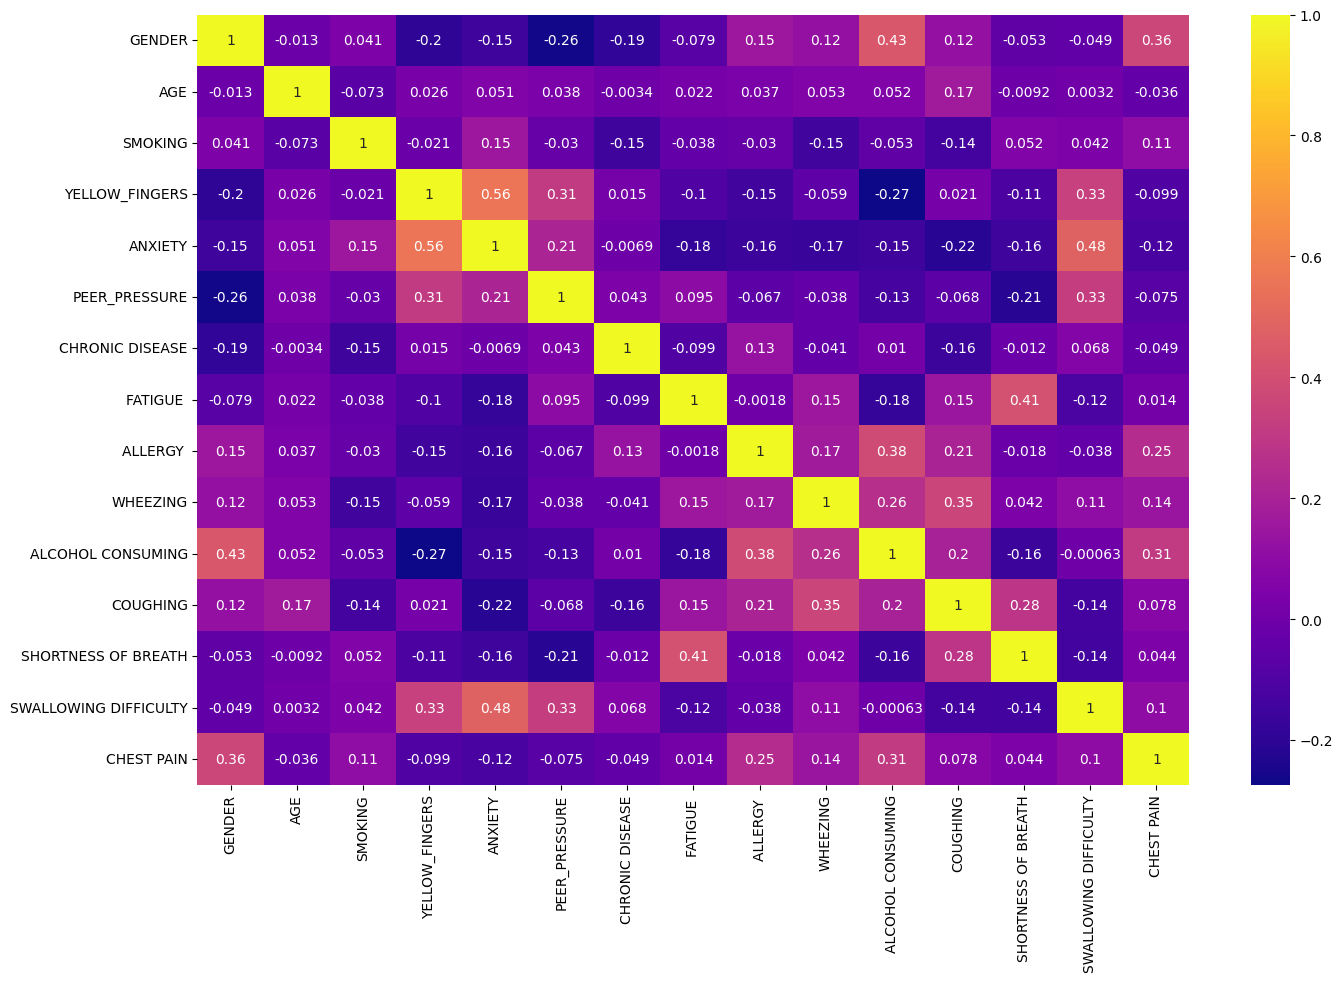

In [ ]:
#checking the correlation of the dataset to see the features that are highly correlated
plt.figure(figsize = (16, 10))
sns.heatmap(X.corr(), annot = True, cmap="plasma")
plt.show()

Determining the correlation and p_value of each variables with LUNG_CANCER


Pearson correlation coefficients and their associated p-values, indicate the strength and significance of the linear relationship between different variables and the presence of lung cancer

In [ ]:
pearson_coef, p_value = stats.pearsonr(lungc['GENDER'], lungc['LUNG_CANCER'])
print("The Pearson Coefficient for GENDER vs LUNG_CANCER is", pearson_coef, 'with a P-value of P ', p_value)
pearson_coef, p_value = stats.pearsonr(lungc['AGE'], lungc['LUNG_CANCER'])
print("The Pearson Coefficient for AGE vs LUNG_CANCER is", pearson_coef, 'with a P-value of P ', p_value)
pearson_coef, p_value = stats.pearsonr(lungc['SMOKING'], lungc['LUNG_CANCER'])
print("The Pearson Coefficient for SMOKING vs LUNG_CANCER is", pearson_coef, 'with a P-value of P ', p_value)
pearson_coef, p_value = stats.pearsonr(lungc['YELLOW_FINGERS'], lungc['LUNG_CANCER'])
print("The Pearson Coefficient for YELLOW_FINGERS vs LUNG_CANCER is", pearson_coef, 'with a P-value of P ', p_value)
pearson_coef, p_value = stats.pearsonr(lungc['ANXIETY'], lungc['LUNG_CANCER'])
print("The Pearson Coefficient for ANXIETY vs LUNG_CANCER is", pearson_coef, 'with a P-value of P ', p_value)
pearson_coef, p_value = stats.pearsonr(lungc['PEER_PRESSURE'], lungc['LUNG_CANCER'])
print("The Pearson Coefficient for PEER_PRESSURE vs LUNG_CANCER is", pearson_coef, 'with a P-value of P ', p_value)
pearson_coef, p_value = stats.pearsonr(lungc['CHRONIC DISEASE'], lungc['LUNG_CANCER'])
print("The Pearson Coefficient for CHRONIC DISEASE vs LUNG_CANCER is", pearson_coef, 'with a P-value of P ', p_value)
#pearson_coef, p_value = stats.pearsonr(lungc['FATIGUE'], lungc['LUNG_CANCER'])
#print("The Pearson Coefficient for FATIGUE vs LUNG_CANCER is", pearson_coef, 'with a P-value of P ', p_value)
#pearson_coef, p_value = stats.pearsonr(lungc['ALLERGY'], lungc['LUNG_CANCER'])
#print("The Pearson Coefficient for ALLERGY vs LUNG_CANCER is", pearson_coef, 'with a P-value of P ', p_value)
pearson_coef, p_value = stats.pearsonr(lungc['WHEEZING'], lungc['LUNG_CANCER'])
print("The Pearson Coefficient for WHEEZING vs LUNG_CANCER is", pearson_coef, 'with a P-value of P ', p_value)
pearson_coef, p_value = stats.pearsonr(lungc['ALCOHOL CONSUMING'], lungc['LUNG_CANCER'])
print("The Pearson Coefficient for ALCOHOL CONSUMING vs LUNG_CANCER is", pearson_coef, 'with a P-value of P ', p_value)
pearson_coef, p_value = stats.pearsonr(lungc['COUGHING'], lungc['LUNG_CANCER'])
print("The Pearson Coefficient for COUGHING vs LUNG_CANCER is", pearson_coef, 'with a P-value of P ', p_value)
pearson_coef, p_value = stats.pearsonr(lungc['SHORTNESS OF BREATH'], lungc['LUNG_CANCER'])
print("The Pearson Coefficient for SHORTNESS OF BREATH vs LUNG_CANCER is", pearson_coef, 'with a P-value of P ', p_value)
pearson_coef, p_value = stats.pearsonr(lungc['SWALLOWING DIFFICULTY'], lungc['LUNG_CANCER'])
print("The Pearson Coefficient for SWALLOWING DIFFICULTY vs LUNG_CANCER is", pearson_coef, 'with a P-value of P ', p_value)
pearson_coef, p_value = stats.pearsonr(lungc['CHEST PAIN'], lungc['LUNG_CANCER'])
print("The Pearson Coefficient for CHEST PAIN vs LUNG_CANCER is", pearson_coef, 'with a P-value of P ', p_value)

The Pearson Coefficient for GENDER vs LUNG_CANCER is 0.05366557796076257 with a P-value of P  0.37445822043868365
The Pearson Coefficient for AGE vs LUNG_CANCER is 0.10630456161354777 with a P-value of P  0.07789243619285603
The Pearson Coefficient for SMOKING vs LUNG_CANCER is 0.034878167879604204 with a P-value of P  0.5639492701946431
The Pearson Coefficient for YELLOW_FINGERS vs LUNG_CANCER is 0.18919200882000878 with a P-value of P  0.0015918720424682616
The Pearson Coefficient for ANXIETY vs LUNG_CANCER is 0.14432182569353627 with a P-value of P  0.0164243396331459
The Pearson Coefficient for PEER_PRESSURE vs LUNG_CANCER is 0.19508605044975105 with a P-value of P  0.0011233493083850344
The Pearson Coefficient for CHRONIC DISEASE vs LUNG_CANCER is 0.1436919405605224 with a P-value of P  0.016905114338845287
The Pearson Coefficient for WHEEZING vs LUNG_CANCER is 0.24905415505642134 with a P-value of P  2.8522774589564133e-05
The Pearson Coefficient for ALCOHOL CONSUMING vs LUNG_CAN

MODEL BUILDING

Model building involved phases such as data split -> Data Normalization -> Feature selection -> classification -> Model Evaluation -> hyperparameter tuning

In [ ]:
#importing necessary libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix

*Data Splitting*

splitting the dataset into training, test and validation set

In [ ]:
# 20% of the data will be used for testing
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=0.2, random_state=7)

**Data Normalization**


Standardization should be fit on the training dataset only to prevent test dataset information from leaking into the training process. Then, the test dataset is standardized using the fitting results from the training dataset.

Application of Scaler

Rescaling the features into 0 and 1 using MIN-MAX scaler

In [ ]:
#importing scaler library
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
# Apply scaler() to all the columns except the '0' or '1' variables
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
#displaying training dataset after scaling
X_train

array([[0.        , 0.67346939, 1.        , ..., 0.        , 1.        ,
        1.        ],
       [1.        , 0.44897959, 0.        , ..., 1.        , 0.        ,
        1.        ],
       [0.        , 0.32653061, 1.        , ..., 1.        , 1.        ,
        0.        ],
       ...,
       [1.        , 0.55102041, 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.51020408, 0.        , ..., 0.        , 1.        ,
        1.        ],
       [0.        , 0.46938776, 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [ ]:
#displaying test dataset after scaling
X_test

array([[ 0.        , -0.34693878,  1.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  1.        ,  0.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ],
       [ 1.        ,  0.6122449 ,  1.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  1.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.65306122,  0.        ,  1.        ,  0.        ,
         0.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         0.        ,  1.        ,  1.        ,  0.        ,  1.        ],
       [ 0.        ,  0.36734694,  0.        ,  0.        ,  0.        ,
         1.        ,  1.        ,  1.        ,  1.        ,  1.        ,
         1.        ,  0.        ,  0.        ,  0.        ,  1.        ],
       [ 1.        ,  0.53061224,  0.        ,  1.        ,  1.        ,
         1.        ,  0.        ,  0.        , 

#*Data Balancing*

Data balancing is done using SMOTE



SMOTE, which stands for Synthetic Minority Over-sampling Technique, is a technique used in machine learning to address the imbalance of classes in a dataset, particularly in the context of classification problems. The imbalance occurs when one class (usually the minority class) is underrepresented compared to the other class or classes (usually the majority class).

The primary goal of SMOTE is to balance the class distribution by generating synthetic samples for the minority class. It does this by creating synthetic examples in feature space that are similar to existing examples from the minority class. This helps prevent the model from being biased toward the majority class and can lead to better classification performance, especially when dealing with imbalanced datasets.

Here's a basic overview of how SMOTE works:

Identify Minority Class Instances:
Determine the instances belonging to the minority class in the dataset.

Select a Minority Class Instance:
Randomly choose an instance from the minority class.

Identify k-Nearest Neighbors:
Find the k-nearest neighbors for the selected instance. The number k is a parameter that determines how many nearest neighbors to consider.

Generate Synthetic Instances:
For each selected instance, create synthetic instances along the line segments joining it to its k-nearest neighbors. The number of synthetic instances to generate is determined by a user-specified oversampling rate.

Repeat Steps 2-4:
Repeat the process until the desired balance between the minority and majority classes is achieved.

steps in using SMOTE:

import necessary libraries

from imblearn.over_sampling import SMOTE

from sklearn.model_selection import train_test_split

from sklearn.datasets import make_classification

* Generate a synthetic imbalanced dataset for illustration

X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9],

n_informative=3, n_redundant=1, flip_y=0, n_features=20,

n_clusters_per_class=1, n_samples=1000, random_state=42)


* Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

* Apply SMOTE to the training data

smote = SMOTE(random_state=42)

X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
#import smote for sampling
from imblearn.over_sampling import SMOTE

from sklearn.datasets import make_classification

In [ ]:
# Apply SMOTE to the training data

smote = SMOTE(random_state=42)

X_train_sm, Y_train_sm = smote.fit_resample(X_train, Y_train)

In [ ]:
# Print the oversampling results
print("\n\t Post OverSampling, the shape of  X_train_sm: {}".format(X_train_sm.shape))
print("\n\t Post OverSampling, the shape of Y_train_sm: {}".format(Y_train_sm.shape))


	 Post OverSampling, the shape of  X_train_sm: (384, 15)

	 Post OverSampling, the shape of Y_train_sm: (384,)


In [ ]:
print("Post OverSampling, label count '1': {}".format(sum(X_train_sm == 1)))
print("Post OverSampling, label count '0': {}".format(sum(Y_train_sm == 0)))

Post OverSampling, label count '1': [157   0 177 168 131 131 130 222 124 147 128 155 210 107 159]
Post OverSampling, label count '0': 192


In [ ]:
X_train_sm.shape


(384, 15)

In [ ]:
Y_train_sm.shape

(384,)

In [ ]:
X_train.shape

(220, 15)

In [ ]:
Y_train.shape

(220,)

#**Classification**

Classification which is the way the model learns the patterns and relationships between input variables and the output labels, allowing it to make prediction on new, unseen data.

In this research,five classification techniques is employed:

Logistic regression
Random Forest Classifier
Support Vector Machine
Decision Trees
k-Nearest Neighbour
1. Logistic Regression

Logistic regression is a statistical method used for binary classification problems, where the goal is to predict a binary output variable (e.g., 0 or 1, yes or no) based on one or more input variables. It is a type of generalized linear model that uses a logistic function to model the relationship between the input variables and the output variable (Hosmer et.al, 2013).

2. Random Forest Classifier

Random Forest is an ensemble learning method that combines multiple decision trees to improve the accuracy and robustness of the predictions. It is used for both classification and regression tasks. The algorithm works by building many decision trees, each trained on a random subset of the input variables and samples from the training data. During prediction, the random forest classifier aggregates the predictions of all the individual trees to produce a final prediction.

3. Support Vector Machine

SVM is a supervised learning method that tries to find the optimal hyperplane that separates the input data into different classes. The algorithm works by mapping the input data into a higher-dimensional feature space using a kernel function, which makes it possible to find a linear hyperplane that separates the data even when the data is not linearly separable in the original feature space

4. Decision Trees

Decision tree is a type of supervised learning method that involves partitioning the input space into a hierarchical tree structure, where each internal node corresponds to a decision based on the input features, and each leaf node corresponds to a class label or a regression value. Decision Trees have several advantages over other machine learning algorithms, including their simplicity, interpretability, and ability to handle both categorical and continuous input variables.

5. KNN KNN is a type of instance-based learning that involves storing all instances of the training data and using them to make predictions for new instances. he KNN algorithm works by finding the K closest instances to a new instance in the feature space and taking the majority class label or the average value of the K nearest neighbours as the prediction. The distance metric used to measure the similarity between instances can vary, with the Euclidean distance being the most common choice.


6. Multi-layer Perceptron classifier

A Multilayer Perceptron (MLP) is a type of artificial neural network that consists of multiple layers of nodes (neurons) organized into an input layer, one or more hidden layers, and an output layer. Each connection between nodes has an associated weight, and the network is trained through a process called backpropagation to learn the optimal weights for making predictions [8]. It is very good in adapting to various datatypes including categorical and numerical, can be applied to wide range of task such as classification and regression



7. Gaussian Naive Bayes

Gaussian Naive Bayes (GNB) is a probabilistic classification algorithm, it assumes that the features follow a Gaussian (normal) distribution, and it makes the "naive" assumption that the features are conditionally independent given the class label [9]. GNB can perform well even with a small amount of training data, the model parameters (mean and variance for each feature and class) can be estimated quickly and independently for each feature, leading to fast training times, especially for large datasets.



8. Ensemble Method

Ensemble means a group of elements viewed as a whole, rather than individually. An Ensemble method creates multiple models and combines them to solve it. Ensemble methods help to improve the robustness/generalizability of the model.

Majority Class Labels (Majority/Hard Voting)

Majority Class Labels is a specific form of ensemble learning where each model votes on the predicted class label, and the class with the majority of votes is selected.

The individual classifiers can be of different types (e.g., decision trees, support vector machines, neural networks) and are trained independently on the same dataset. Each classifier provides its own prediction for a given instance.



Weighted Average Probabilities (Soft Voting)

Weighted Average Probabilities is a form of Soft Voting, an ensemble learning approach where the predicted probabilities or decision values from individual classifiers are combined using weighted averaging. The weights assigned to each classifier are often based on their performance or confidence [11].


9. Cross Validation

K-Fold cross validation is a popular technique used in machine learning for model evaluation and selection. It involves dividing a dataset into K subsets of equal size, called folds. The algorithm then trains and evaluates the model K times, each time using a different fold as the validation set and the remaining K-1 folds as the training set.



During each iteration of K-Fold cross validation, the model is trained on K-1 folds and evaluated on the remaining fold. The performance metrics are then averaged over all K iterations to obtain an estimate of the model's overall performance.

K-Fold cross validation is a robust method for model evaluation because it uses all the available data for training and testing. It also helps to reduce the risk of overfitting and provides a more accurate estimate of the model's performance than using a single training-test split.



Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()

In [ ]:
models = []
models.append(('LR', LogisticRegression()))

In [ ]:
LR = LogisticRegression(random_state=20)
LR.fit(X_train_sm,Y_train_sm)

LogisticRegression(random_state=20)

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn import svm, metrics

In [ ]:
X_train_predict=LR.predict(X_train_sm)
print("Accuracy on training data: ", metrics.accuracy_score(Y_train_sm, X_train_predict))
print("Precision on training data:", metrics.precision_score(Y_train_sm, X_train_predict))
print("Recall on training data:", metrics.recall_score(Y_train_sm, X_train_predict))

Accuracy on training data:  0.9375
Precision on training data: 0.9719101123595506
Recall on training data: 0.9010416666666666


In [ ]:
X_train_predict

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,

Evaluate the Model

In [ ]:
#predicting with test dataset
predictions = LR.predict(X_test)

In [ ]:
predictions

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
#printing the classification reports
print(classification_report(predictions, Y_test))
print(confusion_matrix(Y_test,predictions))
print(accuracy_score(Y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.67      0.73        12
           1       0.91      0.95      0.93        44

    accuracy                           0.89        56
   macro avg       0.86      0.81      0.83        56
weighted avg       0.89      0.89      0.89        56

[[ 8  2]
 [ 4 42]]
0.8928571428571429


In [ ]:
print("Accuracy on test data: ", metrics.accuracy_score(Y_test, predictions))
print("Precision on test data:", metrics.precision_score(Y_test, predictions))
print("Recall on test data:", metrics.recall_score(Y_test, predictions))

Accuracy on test data:  0.8928571428571429
Precision on test data: 0.9545454545454546
Recall on test data: 0.9130434782608695


TN=8, FP=2, FN=4, TP=42


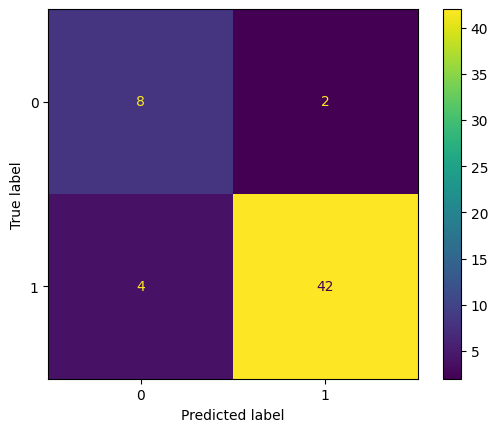

In [ ]:
#Display the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
con_LR = confusion_matrix(Y_test, predictions)
TN, FP, FN, TP = con_LR.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = ConfusionMatrixDisplay(confusion_matrix=con_LR)
disp.plot()
plt.show()

<ipython-input-57-bd7c27b9a7e4>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(lungc['LUNG_CANCER'], hist=False, color="r", label="Actual Value", kde=True)
<ipython-input-57-bd7c27b9a7e4>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(predictions, hist=False, color="b

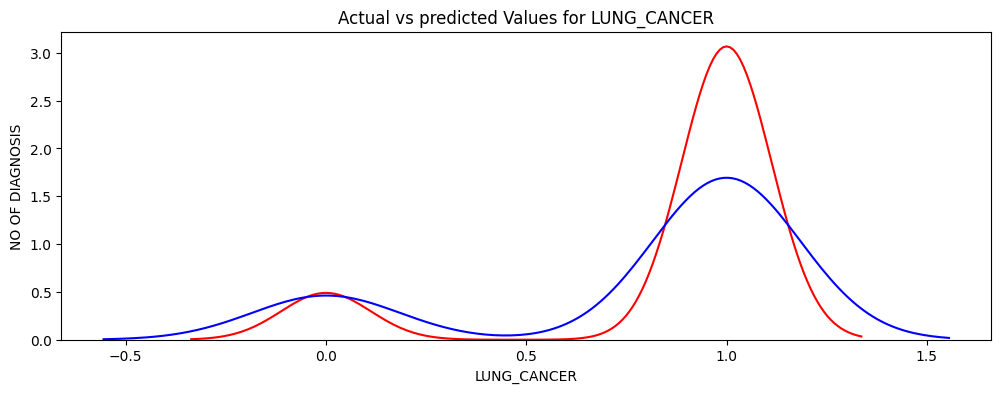

In [ ]:
plt.figure(figsize=(12, 4))

ax1 = sns.distplot(lungc['LUNG_CANCER'], hist=False, color="r", label="Actual Value", kde=True)
sns.distplot(predictions, hist=False, color="b", label="Predicted Values", ax=ax1, kde=True)
plt.title('Actual vs predicted Values for LUNG_CANCER')
plt.xlabel('LUNG_CANCER')
plt.ylabel('NO OF DIAGNOSIS')
plt.show()
plt.close()

Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

import warnings

warnings.filterwarnings('ignore')

In [ ]:
param_grid = [
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

# Create grid search object

clf = GridSearchCV(LR, param_grid = param_grid, cv = 3, verbose=True, n_jobs=-1)

# Fit on data

best_clf = clf.fit(X_train_sm, Y_train_sm)

Fitting 3 folds for each of 1600 candidates, totalling 4800 fits


In [ ]:
best_clf.best_estimator_

LogisticRegression(C=4.281332398719396, max_iter=1000, penalty='l1',
                   random_state=20, solver='saga')

In [ ]:
#getting the best parameter
print(best_clf.best_params_)

{'C': 4.281332398719396, 'max_iter': 1000, 'penalty': 'l1', 'solver': 'saga'}


In [ ]:
print(best_clf.best_score_)

0.9322916666666666


In [ ]:
bestclf_predict=best_clf.predict(X_train_sm)
print("Accuracy on training data: ", metrics.accuracy_score(Y_train_sm, bestclf_predict))
print("Precision on training data:", metrics.precision_score(Y_train_sm, bestclf_predict))
print("Recall on training data:", metrics.recall_score(Y_train_sm, bestclf_predict))

Accuracy on training data:  0.9505208333333334
Precision on training data: 0.9779005524861878
Recall on training data: 0.921875


In [ ]:
y_pred_lr=best_clf.best_estimator_.predict(X_test)
print(confusion_matrix(Y_test,y_pred_lr))
print("Accuracy Score {}".format(accuracy_score(Y_test,y_pred_lr)))
print(classification_report(Y_test,y_pred_lr))

[[ 7  3]
 [ 3 43]]
Accuracy Score 0.8928571428571429
              precision    recall  f1-score   support

           0       0.70      0.70      0.70        10
           1       0.93      0.93      0.93        46

    accuracy                           0.89        56
   macro avg       0.82      0.82      0.82        56
weighted avg       0.89      0.89      0.89        56



In [ ]:
y_pred_lr

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
print("Accuracy on test data: ", metrics.accuracy_score(Y_test, y_pred_lr))
print("Precision on test data:", metrics.precision_score(Y_test, y_pred_lr))
print("Recall on test data:", metrics.recall_score(Y_test, y_pred_lr))

Accuracy on test data:  0.8928571428571429
Precision on test data: 0.9347826086956522
Recall on test data: 0.9347826086956522


TN=7, FP=3, FN=3, TP=43


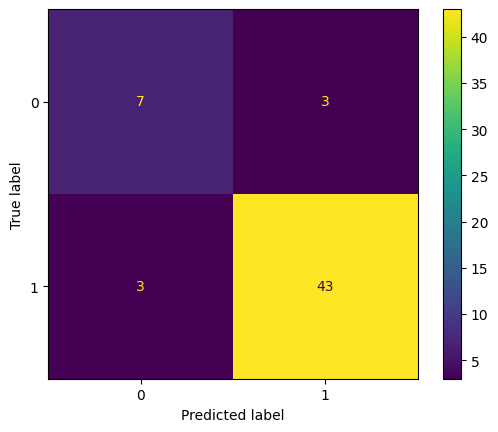

In [ ]:
#Display the confusion matrix
con_lr = confusion_matrix(Y_test, y_pred_lr)
TN, FP, FN, TP = con_lr.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = ConfusionMatrixDisplay(confusion_matrix=con_lr)
disp.plot()
plt.show()

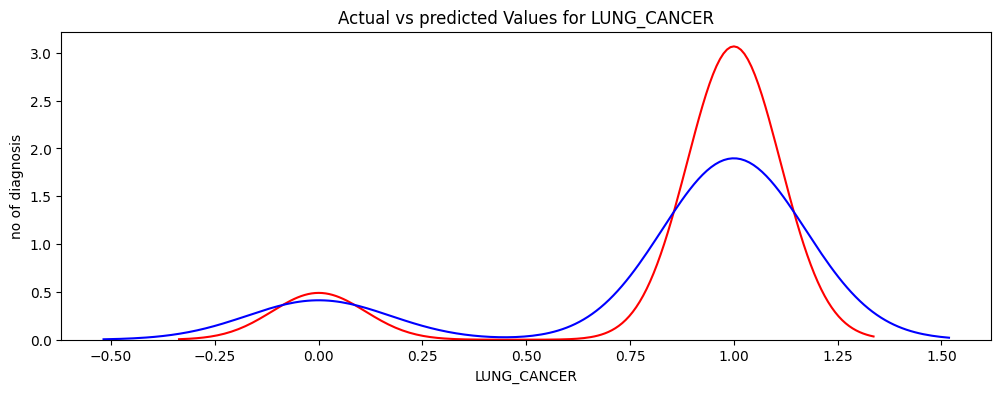

In [ ]:
plt.figure(figsize=(12, 4))

ax1 = sns.distplot(lungc['LUNG_CANCER'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred_lr, hist=False, color="b", label="Predicted Values", ax=ax1)
plt.title('Actual vs predicted Values for LUNG_CANCER')
plt.xlabel('LUNG_CANCER')
plt.ylabel('no of diagnosis')
plt.show()
plt.close()

Random Forest Classifier

In [ ]:
#using random forest classifier to train and predict
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier(n_estimators=10).fit(X_train_sm, Y_train_sm)
prediction = rf_classifier.predict(X_test)

In [ ]:
prediction

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
bestrf_predict=rf_classifier.predict(X_train_sm)
print("Accuracy on training data: ", metrics.accuracy_score(Y_train_sm, bestrf_predict))
print("Precision on training data:", metrics.precision_score(Y_train_sm, bestrf_predict))
print("Recall on training data:", metrics.recall_score(Y_train_sm, bestrf_predict))

Accuracy on training data:  0.9921875
Precision on training data: 1.0
Recall on training data: 0.984375


In [ ]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
print(confusion_matrix(Y_test,prediction))
print(accuracy_score(Y_test,prediction))
print(classification_report(Y_test,prediction))

[[ 8  2]
 [ 3 43]]
0.9107142857142857
              precision    recall  f1-score   support

           0       0.73      0.80      0.76        10
           1       0.96      0.93      0.95        46

    accuracy                           0.91        56
   macro avg       0.84      0.87      0.85        56
weighted avg       0.91      0.91      0.91        56



In [ ]:
print("Accuracy on test data: ", metrics.accuracy_score(Y_test, prediction))
print("Precision on test data:", metrics.precision_score(Y_test, prediction))
print("Recall on test data:", metrics.recall_score(Y_test, prediction))

Accuracy on test data:  0.9107142857142857
Precision on test data: 0.9555555555555556
Recall on test data: 0.9347826086956522


TN=8, FP=2, FN=3, TP=43


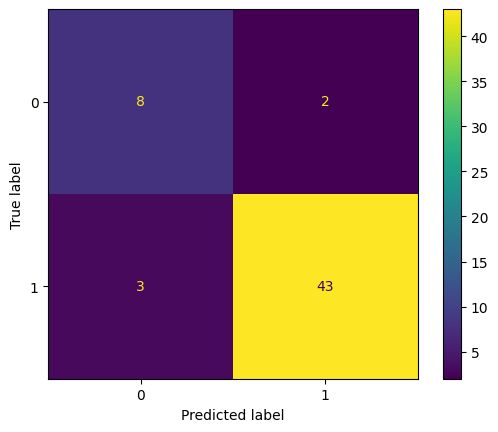

In [ ]:
#Display the confusion matrix
con_rf = confusion_matrix(Y_test, prediction)
TN, FP, FN, TP = con_rf.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = ConfusionMatrixDisplay(confusion_matrix=con_rf)
disp.plot()
plt.show()

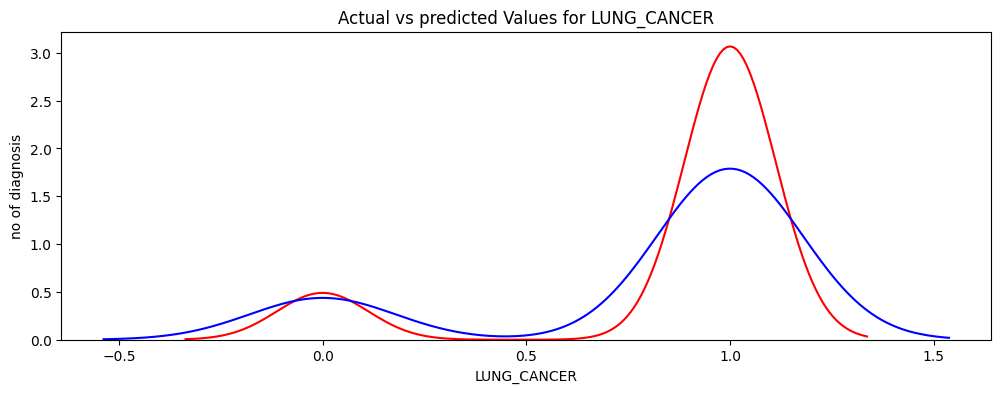

In [ ]:
plt.figure(figsize=(12, 4))

ax1 = sns.distplot(lungc['LUNG_CANCER'], hist=False, color="r", label="Actual Value")
sns.distplot(prediction, hist=False, color="b", label="Predicted Values", ax=ax1)
plt.title('Actual vs predicted Values for LUNG_CANCER')
plt.xlabel('LUNG_CANCER')
plt.ylabel('no of diagnosis')
plt.show()
plt.close()

Hyperparameter Tuning

The main parameters used by a Random Forest Classifier are:

criterion = the function used to evaluate the quality of a split.

max_depth = maximum number of levels allowed in each tree. max_features = maximum number of features considered when splitting a node.

min_samples_leaf = minimum number of samples which can be stored in a tree leaf.

min_samples_split = minimum number of samples necessary in a node to cause node splitting.

n_estimators = number of trees in the ensemble.

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn import metrics


import warnings

warnings.filterwarnings('ignore')

#rf_classifier = RandomForestClassifier()

In [ ]:
forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

clf_rfc = GridSearchCV(rf_classifier, forest_params, cv = 10, scoring='accuracy')

clf_rfc.fit(X_train_sm, Y_train_sm)

GridSearchCV(cv=10, estimator=RandomForestClassifier(n_estimators=10),
             param_grid=[{'max_depth': [10, 11, 12, 13, 14],
                          'max_features': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11,
                                           12, 13]}],
             scoring='accuracy')

In [ ]:
#getting the best parameter
print(clf_rfc.best_params_)

{'max_depth': 14, 'max_features': 1}


In [ ]:
print(clf_rfc.best_score_)

0.9612010796221323


In [ ]:
clf_rfc.best_estimator_

RandomForestClassifier(max_depth=14, max_features=1, n_estimators=10)

In [ ]:
y_pred=clf_rfc.best_estimator_.predict(X_test)
print(confusion_matrix(Y_test,y_pred))
print("Accuracy Score {}".format(accuracy_score(Y_test,y_pred)))
print(classification_report(Y_test,y_pred))

[[ 5  5]
 [ 2 44]]
Accuracy Score 0.875
              precision    recall  f1-score   support

           0       0.71      0.50      0.59        10
           1       0.90      0.96      0.93        46

    accuracy                           0.88        56
   macro avg       0.81      0.73      0.76        56
weighted avg       0.87      0.88      0.87        56



In [ ]:
print("Accuracy on test data: ", metrics.accuracy_score(Y_test, y_pred))
print("Precision on test data:", metrics.precision_score(Y_test, y_pred))
print("Recall on test data:", metrics.recall_score(Y_test, y_pred))

Accuracy on test data:  0.875
Precision on test data: 0.8979591836734694
Recall on test data: 0.9565217391304348


TN=5, FP=5, FN=2, TP=44


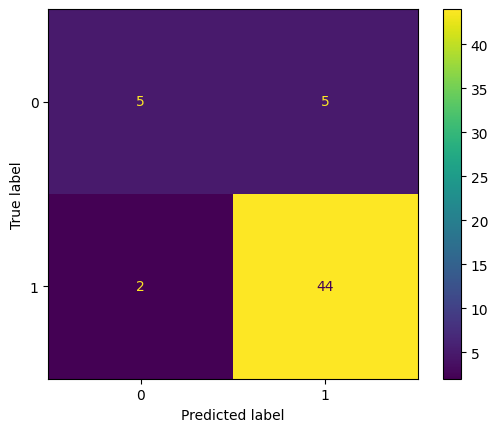

In [ ]:
#Display the confusion matrix
con_hyper_rf = confusion_matrix(Y_test, y_pred)
TN, FP, FN, TP = con_hyper_rf.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = ConfusionMatrixDisplay(confusion_matrix=con_hyper_rf)
disp.plot()
plt.show()

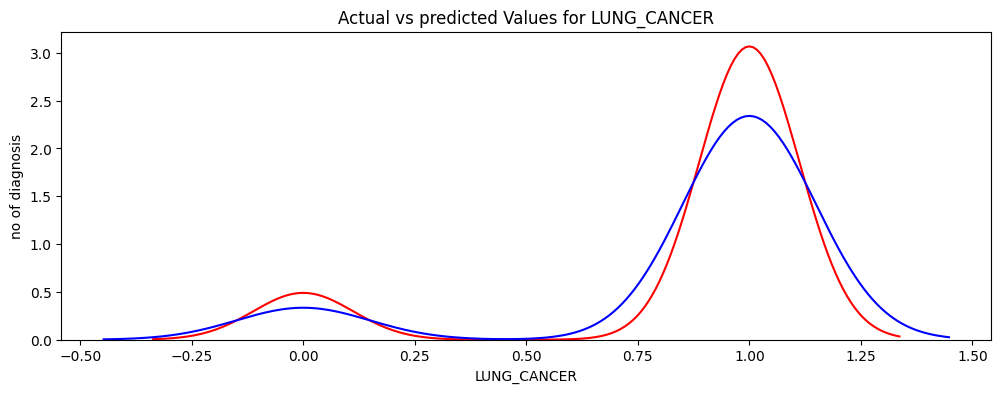

In [ ]:
plt.figure(figsize=(12, 4))

ax1 = sns.distplot(lungc['LUNG_CANCER'], hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Predicted Values", ax=ax1)
plt.title('Actual vs predicted Values for LUNG_CANCER')
plt.xlabel('LUNG_CANCER')
plt.ylabel('no of diagnosis')
plt.show()
plt.close()

Support Vector Machine

SVM

In [ ]:
#import svm model
from sklearn import svm

#create a svm classifier
clf_svm = svm.SVC(kernel='linear')

In [ ]:
#train the model using the training sets
clf_svm.fit(X_train_sm, Y_train_sm)

SVC(kernel='linear')

In [ ]:
#make prediction using test dataset
pred = clf_svm.predict(X_test)

In [ ]:
pred

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
bestsvm_predict=clf_svm.predict(X_train_sm)
print("Accuracy on training data: ", metrics.accuracy_score(Y_train_sm, bestsvm_predict))
print("Precision on training data:", metrics.precision_score(Y_train_sm, bestsvm_predict))
print("Recall on training data:", metrics.recall_score(Y_train_sm, bestsvm_predict))

Accuracy on training data:  0.9453125
Precision on training data: 1.0
Recall on training data: 0.890625


In [ ]:
#print classification metrics reports
print(classification_report(pred, Y_test))
print(confusion_matrix(Y_test,pred))
print(accuracy_score(Y_test,pred))

              precision    recall  f1-score   support

           0       0.70      0.64      0.67        11
           1       0.91      0.93      0.92        45

    accuracy                           0.88        56
   macro avg       0.81      0.78      0.79        56
weighted avg       0.87      0.88      0.87        56

[[ 7  3]
 [ 4 42]]
0.875


In [ ]:
print("Accuracy on test data: ", metrics.accuracy_score(Y_test, pred))
print("Precision on test data:", metrics.precision_score(Y_test, pred))
print("Recall on test data:", metrics.recall_score(Y_test, pred))

Accuracy on test data:  0.875
Precision on test data: 0.9333333333333333
Recall on test data: 0.9130434782608695


TN=7, FP=3, FN=4, TP=42


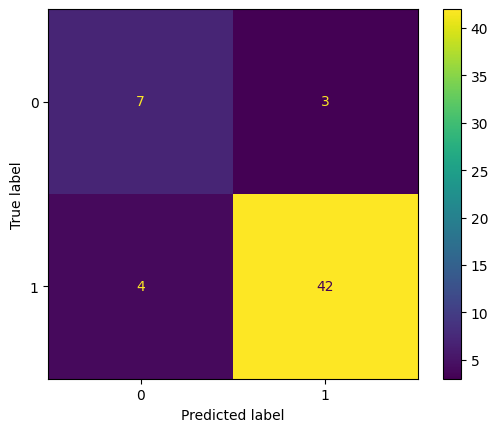

In [ ]:
#Display the confusion matrix
con_svm = confusion_matrix(Y_test, pred)
TN, FP, FN, TP = con_svm.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = ConfusionMatrixDisplay(confusion_matrix=con_svm)
disp.plot()
plt.show()

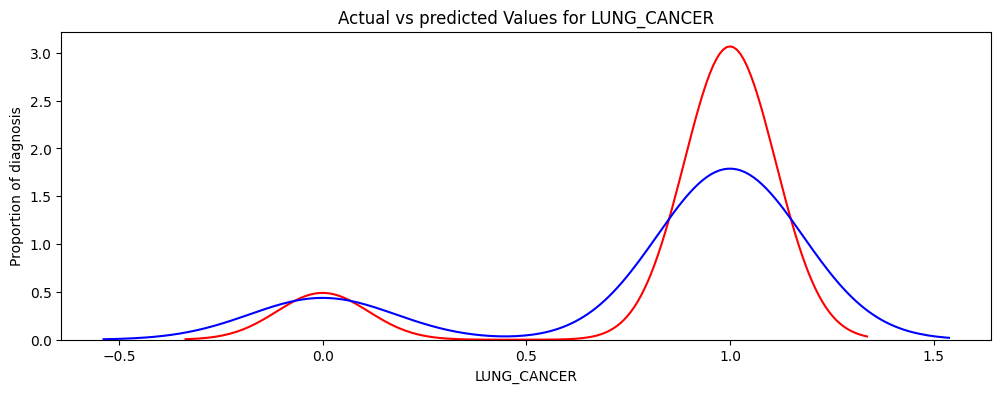

In [ ]:
plt.figure(figsize=(12, 4))

ax1 = sns.distplot(lungc['LUNG_CANCER'], hist=False, color="r", label="Actual Value")
sns.distplot(pred, hist=False, color="b", label="Predicted Values", ax=ax1)
plt.title('Actual vs predicted Values for LUNG_CANCER')
plt.xlabel('LUNG_CANCER')
plt.ylabel('Proportion of diagnosis')
plt.show()
plt.close()

Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV, cross_val_score
from hyperopt import tpe, STATUS_OK, Trials, hp, fmin, STATUS_OK, space_eval
from sklearn.svm import SVC

In [ ]:
#support vector machine default hyperparameters
# Check default values
svc = SVC()
params = svc.get_params()
params_df = pd.DataFrame(params, index=[0])
params_df.T

0
C                          1.0
break_ties               False
cache_size                 200
class_weight              None
coef0                      0.0
decision_function_shape    ovr
degree                       3
gamma                    scale
kernel                     rbf
max_iter                    -1
probability              False
random_state              None
shrinking                 True
tol                      0.001
verbose                  False

In [ ]:
# Run model
svc.fit(X_train_sm, Y_train_sm)

SVC()

In [ ]:
# Accuracy score
print(f'The accuracy score of the model is {svc.score(X_test, Y_test):.4f}')


The accuracy score of the model is 0.9107


In [ ]:
# List of C values
C_range = np.logspace(-1, 1, 3)
print(f'The list of values for C are {C_range}')
# List of gamma values
gamma_range = np.logspace(-1, 1, 3)
print(f'The list of values for gamma are {gamma_range}')

The list of values for C are [ 0.1  1.  10. ]
The list of values for gamma are [ 0.1  1.  10. ]


Two kernels, 'rbf' and 'poly', will be tested.

Scoring is the metric to evaluate the cross-validation results for each model. We set scoring = ['accuracy']. The scoring option can take more than one metric in the list.

StratifiedKFold is used for the cross-validation. It helps us keep the class ratio in the folds the same as the training dataset. n_splits=3 means we are doing 3-fold cross-validation. shuffle=True means the data are shuffled before splitting. random_state=0 makes the shuffle reproducible.

In [ ]:
# Define the search space
param_grid = {
    # Regularization parameter.
    "C": C_range,
    # Kernel type
    "kernel": ['rbf', 'poly'],
    # Gamma is the Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’.
    "gamma": gamma_range.tolist()+['scale', 'auto']
    }
# Set up score
scoring = ['accuracy', 'precision', 'recall']
# Set up the k-fold cross-validation
kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

In [ ]:
# Define grid search
grid_search = GridSearchCV(estimator=svc,
                           param_grid=param_grid,
                           scoring=scoring,
                           refit='accuracy',
                           n_jobs=-1,
                           cv=kfold,
                           verbose=0)
# Fit grid search
grid_result = grid_search.fit(X_train_sm, Y_train_sm)
# Print grid search summary
grid_result

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=0, shuffle=True),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([ 0.1,  1. , 10. ]),
                         'gamma': [0.1, 1.0, 10.0, 'scale', 'auto'],
                         'kernel': ['rbf', 'poly']},
             refit='accuracy', scoring=['accuracy', 'precision', 'recall'])

In [ ]:
# Print the best accuracy score for the training dataset
print(f'The best accuracy score for the training dataset is {grid_result.best_score_:.4f}')

# Print the hyperparameters for the best score
print(f'The best hyperparameters are {grid_result.best_params_}')

# Print the best accuracy score for the testing dataset
print(f'The accuracy score for the testing dataset is {grid_search.score(X_test, Y_test):.4f}')

The best accuracy score for the training dataset is 0.9714
The best hyperparameters are {'C': 10.0, 'gamma': 1.0, 'kernel': 'rbf'}
The accuracy score for the testing dataset is 0.8571


Decision Tree

In [ ]:
#import libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [ ]:
#train the dataset
clf_t = tree.DecisionTreeClassifier(random_state=1)

clf_t = clf_t.fit(X_train_sm, Y_train_sm)

In [ ]:
#predict using the test dataset

clf_t.predict(X_test)

array([0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1])

Defined a helper function to evaluate each trained model and with the metrics mentioned above and save the score to a variable.

In [ ]:
def evaluate_model(model, X_test, Y_test):
    from sklearn import metrics

    # Predict Test Data
    y_pred = model.predict(X_test)

    # Calculate accuracy, precision, recall, f1-score, and kappa score
    acc = metrics.accuracy_score(Y_test, y_pred)
    prec = metrics.precision_score(Y_test, y_pred)
    rec = metrics.recall_score(Y_test, y_pred)
    f1 = metrics.f1_score(Y_test, y_pred)
    kappa = metrics.cohen_kappa_score(Y_test, y_pred)

    # Calculate area under curve (AUC)
    y_pred_proba = model.predict_proba(X_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(Y_test, y_pred_proba)
    auc = metrics.roc_auc_score(Y_test, y_pred_proba)

    # Display confussion matrix
    cm = metrics.confusion_matrix(Y_test, y_pred)

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1, 'kappa': kappa,
            'fpr': fpr, 'tpr': tpr, 'auc': auc, 'cm': cm}

In [ ]:
#evaluate model
dt_eval = evaluate_model(clf_t, X_test, Y_test)

# Print result
print('Accuracy:', dt_eval['acc'])
print('Precision:', dt_eval['prec'])
print('Recall:', dt_eval['rec'])
print('F1 Score:', dt_eval['f1'])
print('Cohens Kappa Score:', dt_eval['kappa'])
print('Area Under Curve:', dt_eval['auc'])
print('Confusion Matrix:\n', dt_eval['cm'])

Accuracy: 0.8928571428571429
Precision: 0.9166666666666666
Recall: 0.9565217391304348
F1 Score: 0.9361702127659574
Cohens Kappa Score: 0.6037735849056604
Area Under Curve: 0.7782608695652173
Confusion Matrix:
 [[ 6  4]
 [ 2 44]]


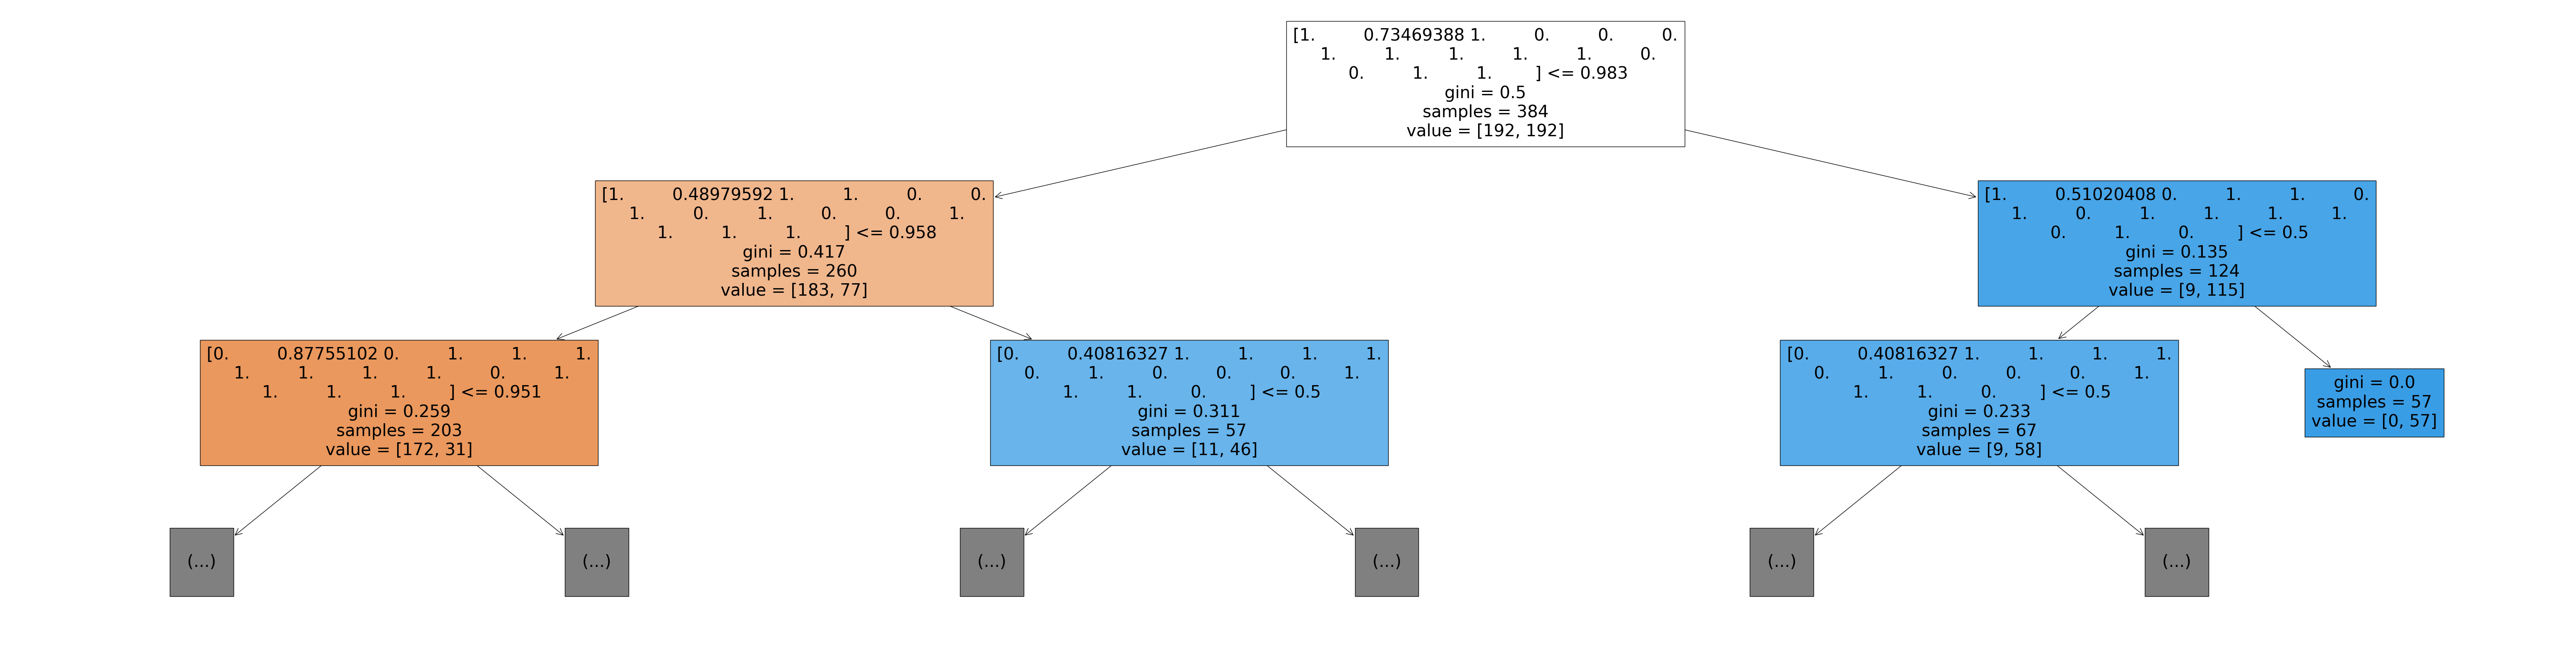

In [ ]:
#plotting the tree
from sklearn.tree import plot_tree, export_text
plt.figure(figsize =(80,20))

plot_tree(clf_t, feature_names=X_train, max_depth=2, filled=True);

HYperparameter Tuning

this is done using the

Max_depth and

Max_leaf_nodes

This argument represents the maximum depth of a tree. If not specified, the tree is expanded until the last leaf nodes contain a single value. Hence by reducing this meter, we can preclude the tree from learning all training samples thereby, preventing over-fitting.

In [ ]:
clf_t.tree_.max_depth

9

In [ ]:
#accuracy on train dataset
clf_t.score(X_train_sm, Y_train_sm)

0.9973958333333334

In [ ]:
#accuracy on test dataset
clf_t.score(X_test, Y_test )

0.8928571428571429

Since we are not sure what depth our ideal model would have, a 'for loop' is run from a range of numbers to find out. This basic has been used to create for loop to print the training and validation accuracy of the model across the range 1–15.

In [ ]:
for max_d in range(1,15):
  model = DecisionTreeClassifier(max_depth=max_d, random_state=42)
  model.fit(X_train_sm, Y_train_sm)
  print('The Training Accuracy for max_depth {} is:'.format(max_d), model.score(X_train_sm, Y_train_sm))
  print('The Validation Accuracy for max_depth {} is:'.format(max_d), model.score(X_test,Y_test))
  print('')

The Training Accuracy for max_depth 1 is: 0.7760416666666666
The Validation Accuracy for max_depth 1 is: 0.7142857142857143

The Training Accuracy for max_depth 2 is: 0.8671875
The Validation Accuracy for max_depth 2 is: 0.8571428571428571

The Training Accuracy for max_depth 3 is: 0.8802083333333334
The Validation Accuracy for max_depth 3 is: 0.8392857142857143

The Training Accuracy for max_depth 4 is: 0.9192708333333334
The Validation Accuracy for max_depth 4 is: 0.8928571428571429

The Training Accuracy for max_depth 5 is: 0.9609375
The Validation Accuracy for max_depth 5 is: 0.8928571428571429

The Training Accuracy for max_depth 6 is: 0.9791666666666666
The Validation Accuracy for max_depth 6 is: 0.875

The Training Accuracy for max_depth 7 is: 0.984375
The Validation Accuracy for max_depth 7 is: 0.875

The Training Accuracy for max_depth 8 is: 0.9947916666666666
The Validation Accuracy for max_depth 8 is: 0.875

The Training Accuracy for max_depth 9 is: 0.9973958333333334
The Va

Max Leaf Node

this hyperparameter caps the number of leaf nodes in a decision tree.

It will allow the branches of a tree to have varying depths, another way to control the model’s complexity

In [ ]:
clf_t = tree.DecisionTreeClassifier(max_leaf_nodes=30, random_state=42)

clf_t = clf_t.fit(X_train_sm, Y_train_sm)

In [ ]:
clf_t.score(X_train_sm, Y_train_sm)

0.9921875

In [ ]:
clf_t.score(X_test, Y_test)

0.8928571428571429

In [ ]:
clf_t.tree_.max_depth

9

In [ ]:
# define the range of values to search for the max_leaf_nodes parameter
param_grid = {
    'max_leaf_nodes': [None, 5, 10, 15, 20, 25]
}

# define the grid search cross-validation
grid_search = GridSearchCV(clf_t, param_grid, cv=5)

# fit the grid search cross-validation to the data
grid_search.fit(X_train_sm, Y_train_sm)

# print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

print('The Training Accuracy for max_leaf_node {} is:', grid_search.score(X_train_sm, Y_train_sm))
print('The Validation Accuracy for max_leaf_node {} is:', grid_search.score(X_test,Y_test))

Best parameters:  {'max_leaf_nodes': None}
Best score:  0.9167122351332878
The Training Accuracy for max_leaf_node {} is: 0.9973958333333334
The Validation Accuracy for max_leaf_node {} is: 0.9107142857142857


KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Building KNN model
knn = KNeighborsClassifier()
knn.fit(X_train_sm, Y_train_sm)

KNeighborsClassifier()

In [ ]:
from sklearn.metrics import roc_auc_score

In [ ]:
#Predict test data set.
yknn_pred = knn.predict(X_test)

#Checking performance the model with classification report.
print(classification_report(Y_test, yknn_pred))

#Checking performance our model with ROC Score.
roc_auc_score(Y_test, yknn_pred)

              precision    recall  f1-score   support

           0       0.71      1.00      0.83        10
           1       1.00      0.91      0.95        46

    accuracy                           0.93        56
   macro avg       0.86      0.96      0.89        56
weighted avg       0.95      0.93      0.93        56



0.9565217391304348

In [ ]:
print("Accuracy on test data: ", metrics.accuracy_score(Y_test, yknn_pred))
print("Precision on test data:", metrics.precision_score(Y_test, yknn_pred))
print("Recall on test data:", metrics.recall_score(Y_test, yknn_pred))

Accuracy on test data:  0.9285714285714286
Precision on test data: 1.0
Recall on test data: 0.9130434782608695


TN=10, FP=0, FN=4, TP=42


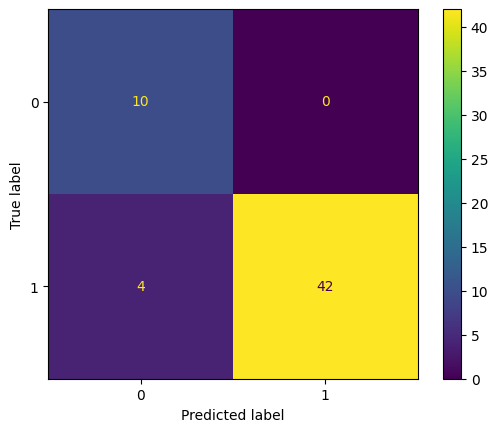

In [ ]:
#Display the confusion matrix
con_knn = confusion_matrix(Y_test, yknn_pred)
TN, FP, FN, TP = con_knn.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = ConfusionMatrixDisplay(confusion_matrix=con_knn)
disp.plot()
plt.show()

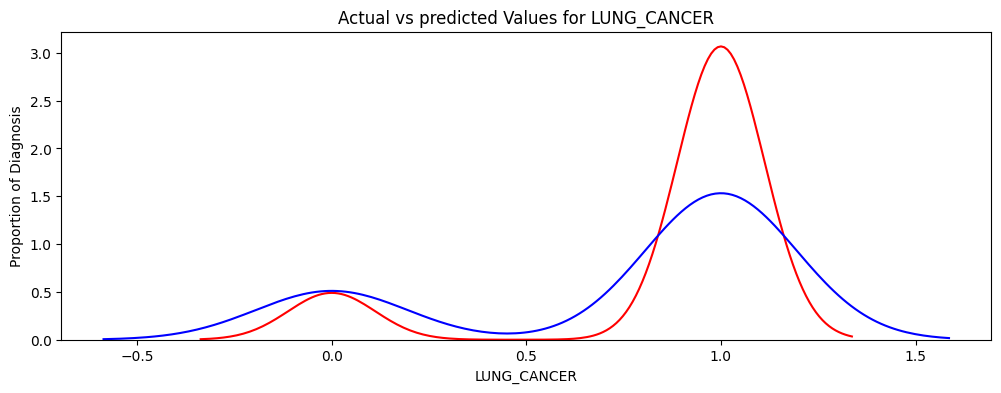

In [ ]:
plt.figure(figsize=(12, 4))

ax1 = sns.distplot(lungc['LUNG_CANCER'], hist=False, color="r", label="Actual Value")
sns.distplot(yknn_pred, hist=False, color="b", label="Predicted Values", ax=ax1)
plt.title('Actual vs predicted Values for LUNG_CANCER')
plt.xlabel('LUNG_CANCER')
plt.ylabel('Proportion of Diagnosis')
plt.show()
plt.close()

Hyper Parameter Tuning in KNN

In [ ]:
#List Hyperparameters that we like to tune.
leaf_size = list(range(1,50))
n_neighbors = list(range(1,30))
p=[1,2]
#Convert to dictionary
hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p)

#Create new KNN object
knn_2 = KNeighborsClassifier()

#Use GridSearch
clf_knn2= GridSearchCV(knn_2, hyperparameters, cv=10)

#Fit the model
best_model = clf_knn2.fit(X_train_sm, Y_train_sm)

#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Best leaf_size: 22
Best p: 1
Best n_neighbors: 1


From GridSearch, it can be seen that the best number of leaf_size is 22 while the optimal distance method is Manhattan or p = 1.

Then the most optimal number of K is 1.

In [ ]:
#Predict test data set again.
yknn2_pred = clf_knn2.predict(X_test)

#Checking performance the model with classification report again.
print(classification_report(Y_test, yknn2_pred))

#Checking performance our model with ROC Score again.
roc_auc_score(Y_test, yknn2_pred)

              precision    recall  f1-score   support

           0       0.78      0.70      0.74        10
           1       0.94      0.96      0.95        46

    accuracy                           0.91        56
   macro avg       0.86      0.83      0.84        56
weighted avg       0.91      0.91      0.91        56



0.8282608695652174

In [ ]:
print("Accuracy on test data: ", metrics.accuracy_score(Y_test, yknn2_pred))
print("Precision on test data:", metrics.precision_score(Y_test, yknn2_pred))
print("Recall on test data:", metrics.recall_score(Y_test, yknn2_pred))

Accuracy on test data:  0.9107142857142857
Precision on test data: 0.9361702127659575
Recall on test data: 0.9565217391304348


Multi-layer Perceptron classifier

In [ ]:
#Training a neural network model
from sklearn.neural_network import MLPClassifier
mlp_classifier = MLPClassifier()
mlp_classifier.fit(X_train_sm, Y_train_sm)

MLPClassifier()

In [ ]:
#Predicting result using testing data
y_mlp_pred= mlp_classifier.predict(X_test)


In [ ]:
y_mlp_pred

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
bestmlp_predict=mlp_classifier.predict(X_train_sm)
print("Accuracy on training data: ", metrics.accuracy_score(Y_train_sm, bestmlp_predict))
print("Precision on training data:", metrics.precision_score(Y_train_sm, bestmlp_predict))
print("Recall on training data:", metrics.recall_score(Y_train_sm, bestmlp_predict))

Accuracy on training data:  0.9661458333333334
Precision on training data: 1.0
Recall on training data: 0.9322916666666666


In [ ]:
#print classification metrics reports
print(classification_report(Y_test, y_mlp_pred))
print(confusion_matrix(Y_test,y_mlp_pred))
print(accuracy_score(Y_test,y_mlp_pred))

              precision    recall  f1-score   support

           0       0.60      0.60      0.60        10
           1       0.91      0.91      0.91        46

    accuracy                           0.86        56
   macro avg       0.76      0.76      0.76        56
weighted avg       0.86      0.86      0.86        56

[[ 6  4]
 [ 4 42]]
0.8571428571428571


In [ ]:
print("Accuracy on test data: ", metrics.accuracy_score(Y_test, y_mlp_pred))
print("Precision on test data:", metrics.precision_score(Y_test, y_mlp_pred))
print("Recall on test data:", metrics.recall_score(Y_test, y_mlp_pred))

Accuracy on test data:  0.8571428571428571
Precision on test data: 0.9130434782608695
Recall on test data: 0.9130434782608695


TN=6, FP=4, FN=4, TP=42


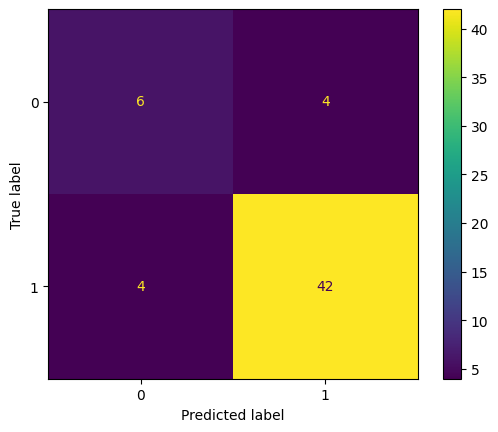

In [ ]:
#Display the confusion matrix
con_mlp = confusion_matrix(Y_test, y_mlp_pred)
TN, FP, FN, TP = con_mlp.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = ConfusionMatrixDisplay(confusion_matrix=con_mlp)
disp.plot()
plt.show()

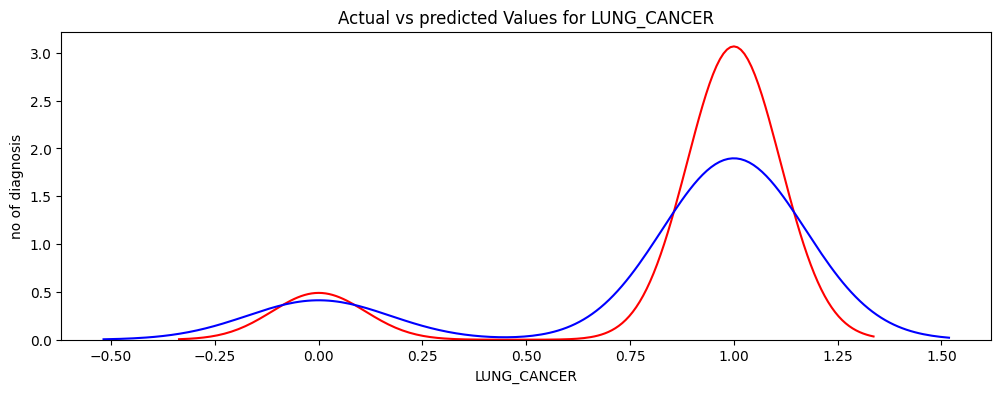

In [ ]:
plt.figure(figsize=(12, 4))

ax1 = sns.distplot(lungc['LUNG_CANCER'], hist=False, color="r", label="Actual Value")
sns.distplot(y_mlp_pred, hist=False, color="b", label="Predicted Values", ax=ax1)
plt.title('Actual vs predicted Values for LUNG_CANCER')
plt.xlabel('LUNG_CANCER')
plt.ylabel('no of diagnosis')
plt.show()
plt.close()

Hyperparameter Tuning

In [ ]:
#hyperparameter tunning for multilayer perceptron
#Define a hyper-parameter space to search. (All the values that you want to try out.)
parameter_space = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

In [ ]:
from sklearn.model_selection import GridSearchCV

clf_mlp = GridSearchCV(mlp_classifier, parameter_space, n_jobs=-1, cv=3)
clf_mlp.fit(X_train_sm, Y_train_sm)

GridSearchCV(cv=3, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'activation': ['tanh', 'relu'],
                         'alpha': [0.0001, 0.05],
                         'hidden_layer_sizes': [(50, 50, 50), (50, 100, 50),
                                                (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'solver': ['sgd', 'adam']})

In [ ]:
# Best parameter set
print('Best parameters found:\n', clf_mlp.best_params_)

# All results
means = clf_mlp.cv_results_['mean_test_score']
stds = clf_mlp.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf_mlp.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Best parameters found:
 {'activation': 'relu', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.875 (+/-0.058) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.938 (+/-0.034) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'constant', 'solver': 'adam'}
0.888 (+/-0.032) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'sgd'}
0.938 (+/-0.044) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 50, 50), 'learning_rate': 'adaptive', 'solver': 'adam'}
0.909 (+/-0.052) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver': 'sgd'}
0.943 (+/-0.052) for {'activation': 'tanh', 'alpha': 0.0001, 'hidden_layer_sizes': (50, 100, 50), 'learning_rate': 'constant', 'solver

In [ ]:
#making new predictions on test dataset
Y_mlp_true, Y_mlp_pred = Y_test , clf_mlp.predict(X_test)

from sklearn.metrics import classification_report
print('Results on the test set:')
print(classification_report(Y_mlp_true, Y_mlp_pred))

Results on the test set:
              precision    recall  f1-score   support

           0       0.75      0.60      0.67        10
           1       0.92      0.96      0.94        46

    accuracy                           0.89        56
   macro avg       0.83      0.78      0.80        56
weighted avg       0.89      0.89      0.89        56



In [ ]:
print("Accuracy on test data: ", metrics.accuracy_score(Y_test, Y_mlp_pred))
print("Precision on test data:", metrics.precision_score(Y_test, Y_mlp_pred))
print("Recall on test data:", metrics.recall_score(Y_test, Y_mlp_pred))

Accuracy on test data:  0.8928571428571429
Precision on test data: 0.9166666666666666
Recall on test data: 0.9565217391304348


Gaussian Naive Bayes

In [ ]:
#Fitting Gaussian Naive Bayes classifier to the training set
from sklearn.naive_bayes import GaussianNB
gnb_classifer = GaussianNB()
gnb_classifer.fit(X_train_sm, Y_train_sm)

GaussianNB()

In [ ]:
bestgnb_predict=gnb_classifer.predict(X_train_sm)
print("Accuracy on training data: ", metrics.accuracy_score(Y_train_sm, bestgnb_predict))
print("Precision on training data:", metrics.precision_score(Y_train_sm, bestgnb_predict))
print("Recall on training data:", metrics.recall_score(Y_train_sm, bestgnb_predict))

Accuracy on training data:  0.8697916666666666
Precision on training data: 0.8446601941747572
Recall on training data: 0.90625


In [ ]:
#Predicting result using testing data
gnb_y_pred= gnb_classifer.predict(X_test)


In [ ]:
gnb_y_pred

array([1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1])

In [ ]:
#print classification metrics reports
print(classification_report(Y_test, gnb_y_pred))
print(confusion_matrix(Y_test,gnb_y_pred))
print(accuracy_score(Y_test,gnb_y_pred))

              precision    recall  f1-score   support

           0       0.67      0.60      0.63        10
           1       0.91      0.93      0.92        46

    accuracy                           0.88        56
   macro avg       0.79      0.77      0.78        56
weighted avg       0.87      0.88      0.87        56

[[ 6  4]
 [ 3 43]]
0.875


In [ ]:
print("Accuracy on test data: ", metrics.accuracy_score(Y_test, gnb_y_pred))
print("Precision on test data:", metrics.precision_score(Y_test, gnb_y_pred))
print("Recall on test data:", metrics.recall_score(Y_test, gnb_y_pred))

Accuracy on test data:  0.875
Precision on test data: 0.9148936170212766
Recall on test data: 0.9347826086956522


TN=6, FP=4, FN=3, TP=43


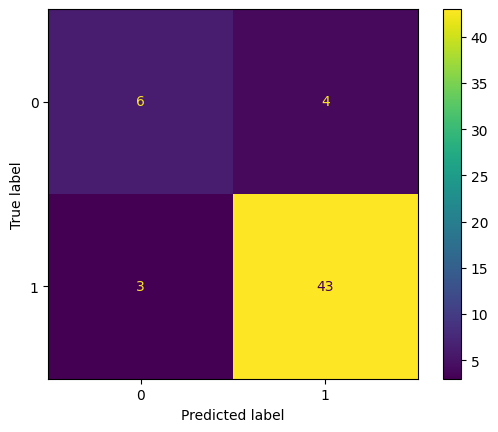

In [ ]:
#Display the confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
con_gnb = confusion_matrix(Y_test, gnb_y_pred)
TN, FP, FN, TP = con_gnb.ravel()
print("TN={0}, FP={1}, FN={2}, TP={3}".format(TN, FP, FN, TP))
disp = ConfusionMatrixDisplay(confusion_matrix=con_gnb)
disp.plot()
plt.show()

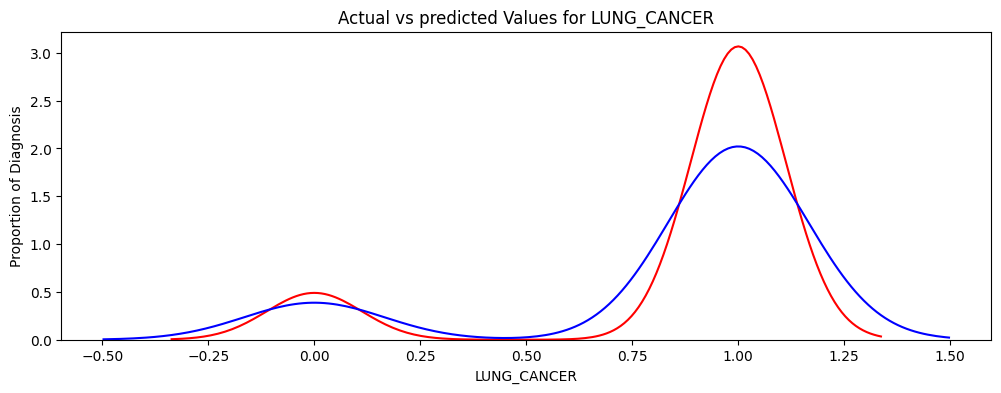

In [ ]:
plt.figure(figsize=(12, 4))

ax1 = sns.distplot(lungc['LUNG_CANCER'], hist=False, color="r", label="Actual Value")
sns.distplot(gnb_y_pred, hist=False, color="b", label="Predicted Values", ax=ax1)
plt.title('Actual vs predicted Values for LUNG_CANCER')
plt.xlabel('LUNG_CANCER')
plt.ylabel('Proportion of Diagnosis')
plt.show()
plt.close()

Hyperparameter Tuning for Guassian Naive Bayes

In [ ]:
gnb_classifier = GaussianNB()

params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(estimator=gnb_classifier,
                 param_grid=params_NB,
                 cv=3,   # use any cross validation technique
                 verbose=2,
                 scoring='accuracy')
gs_NB.fit(X_train_sm, Y_train_sm)

gs_NB.best_params_

Fitting 3 folds for each of 100 candidates, totalling 300 fits
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ..................................var_smoothing=1.0; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ...................var_smoothing=0.8111308307896871; total time=   0.0s
[CV] END ....................var_smoothing=0.657933224657568; total time=   0.0s
[CV] END ....................var_smoothing=0.657933224657568; total time=   0.0s
[CV] END ....................var_smoothing=0.657933224657568; total time=   0.0s
[CV] END ....................var_smoothing=0.533669923120631; total time=   0.0s
[CV] END ....................var_smoothing=0.533669923120631; total time=   0.0s
[CV] END ....................var_smoothing=0.5

{'var_smoothing': 0.2848035868435802}

In [ ]:
print(gs_NB.best_params_)
print(gs_NB.best_score_)

{'var_smoothing': 0.2848035868435802}
0.9036458333333334


ENSEMBLE METHOD

Ensemble means a group of elements viewed as a whole rather than individually. An Ensemble method creates multiple models and combines them to solve it. Ensemble methods help to improve the robustness/generalizability of the model

Majority Class Labels (Majority/Hard Voting)

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier

In [ ]:
LR = LogisticRegression(random_state=1)
rf_classifier = RandomForestClassifier(n_estimators=50, random_state=1)
gnb_classifer = GaussianNB()

In [ ]:
eclf = VotingClassifier(
     estimators=[('lr', LR), ('rf', rf_classifier), ('gnb', gnb_classifer)],
     voting='hard')

In [ ]:
for clf, label in zip([LR, rf_classifier, gnb_classifer, eclf], ['Logistic Regression', 'Random Forest', 'naive Bayes', 'Ensemble']):
   scores = cross_val_score(clf, X_train_sm, Y_train_sm, scoring='accuracy', cv=5)
   print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.91 (+/- 0.04) [Logistic Regression]
Accuracy: 0.94 (+/- 0.03) [Random Forest]
Accuracy: 0.86 (+/- 0.04) [naive Bayes]
Accuracy: 0.92 (+/- 0.03) [Ensemble]


Weighted Average Probabilities (Soft Voting)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product
from sklearn.ensemble import VotingClassifier

In [ ]:
 #Training classifiers
clf_t = DecisionTreeClassifier(max_depth=4)
knn = KNeighborsClassifier(n_neighbors=7)
clf_svm = SVC(gamma=0.1,kernel='rbf', probability=True)
eclf_s = VotingClassifier(estimators=[('dt', clf_t), ('knn', knn), ('svc', clf_svm)],
                        voting='soft', weights=[2, 1, 2])

In [ ]:
X2_train =X_train_sm[:, [0,12]]
Y2_train = Y_train_sm

In [ ]:
clf_t = clf_t.fit(X2_train, Y2_train)
knn = knn.fit(X2_train, Y2_train)
clf_svm = clf_svm.fit(X2_train, Y2_train)
eclf_s = eclf_s.fit(X2_train, Y2_train)

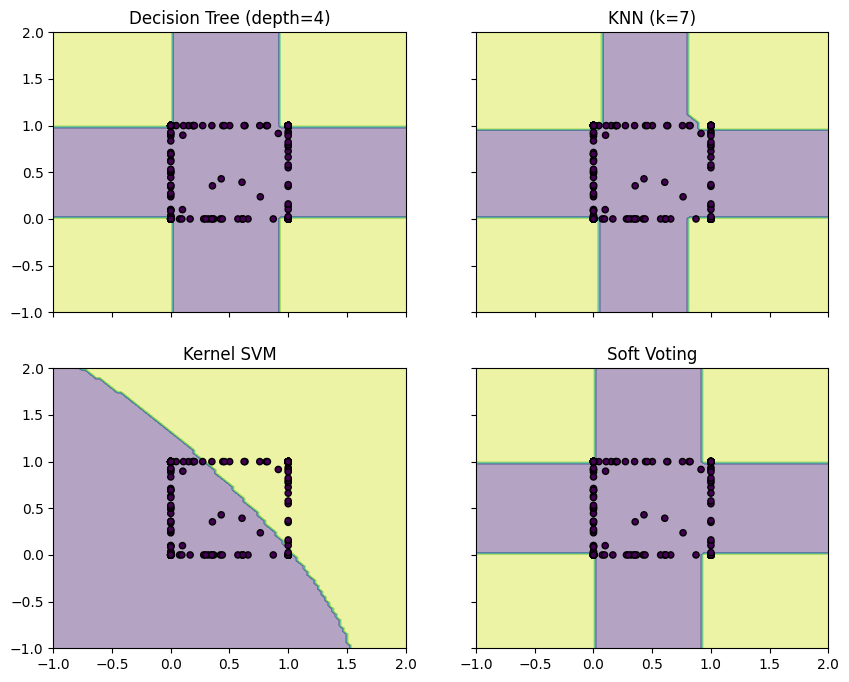

In [ ]:
# Plotting decision regions
from sklearn.inspection import DecisionBoundaryDisplay
f, axarr = plt.subplots(2, 2, sharex="col", sharey="row", figsize=(10, 8))
for idx, clf, tt in zip(
    product([0, 1], [0, 1]),
    [clf_t, knn, clf_svm, eclf_s],
    ["Decision Tree (depth=4)", "KNN (k=7)", "Kernel SVM", "Soft Voting"],
):
    DecisionBoundaryDisplay.from_estimator(
        clf, X2_train, alpha=0.4, ax=axarr[idx[0], idx[1]], response_method="predict"
    )
    axarr[idx[0], idx[1]].scatter(X2_train[:, 0], X2_train[:, 1], c=Y2_train, s=20, edgecolor="k")
    axarr[idx[0], idx[1]].set_title(tt)

plt.show()

In [ ]:
for clf, label in zip([clf_t, knn, clf_svm, eclf_s], ['Decision tree', 'K Nearest Neighbor', 'Support Vector Machine', 'Ensemble']):
   scores = cross_val_score(clf, X_train_sm, Y_train_sm, scoring='accuracy', cv=5)
   print("Accuracy: %0.2f (+/- %0.2f) [%s]" % (scores.mean(), scores.std(), label))

Accuracy: 0.90 (+/- 0.04) [Decision tree]
Accuracy: 0.89 (+/- 0.05) [K Nearest Neighbor]
Accuracy: 0.92 (+/- 0.04) [Support Vector Machine]
Accuracy: 0.92 (+/- 0.03) [Ensemble]


CROSS VALIDATION

K-Fold cross validation is a popular technique used in machine learning for model evaluation and selection. It involves dividing a dataset into K subsets of equal size, called folds. The algorithm then trains and evaluates the model K times, each time using a different fold as the validation set and the remaining K-1 folds as the training set.

During each iteration of K-Fold cross validation, the model is trained on K-1 folds and evaluated on the remaining fold. The performance metrics are then averaged over all K iterations to obtain an estimate of the model's overall performance.

K-Fold cross validation is a robust method for model evaluation because it uses all the available data for training and testing. It also helps to reduce the risk of overfitting and provides a more accurate estimate of the model's performance than using a single training-test split.

Typically, values of K between 5 and 10 are used for K-Fold cross validation, but the optimal value of K may vary depending on the size and complexity of the dataset, as well as the type of model being evaluated.

Here are some general guidelines that can help you choose an appropriate value of K:

For small datasets, it is recommended to use a larger value of K, such as 10. This is because the larger value of K allows for more robust estimates of model performance, given the limited amount of data.

For larger datasets, a smaller value of K can be used, such as 5. This is because a larger value of K will result in K smaller training sets, which may not be representative of the full dataset. Using a smaller value of K ensures that each fold has a sufficient amount of data for both training and testing.

For models that are computationally expensive or time-consuming to train, a smaller value of K is preferred to reduce the overall training time.

It's also essential to note that the choice of K should not be based solely on the accuracy of the model. Other metrics, such as precision, recall, and F1 score, should also be considered, as they can provide valuable insights into the performance of the model.

In [ ]:
# K-Fold Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k = 10
kf = KFold(n_splits=k, shuffle=True, random_state=42)


# Logistic regerssion model
lr_clf_scores = cross_val_score(LR, X_train_sm, Y_train_sm, cv=kf)

# Decision tree model
dt_clf_scores = cross_val_score(clf_t, X_train_sm, Y_train_sm, cv=kf)

# KNN model
knn_model_scores = cross_val_score(knn, X_train_sm, Y_train_sm, cv=kf)

# Gaussian naive bayes model
gnb_model_scores = cross_val_score(gnb_classifier, X_train_sm, Y_train_sm, cv=kf)

# Support Vector Classifier model
svm_clf_scores = cross_val_score(clf_svm,X_train_sm, Y_train_sm, cv=kf)

# Random forest model
rf_clf_scores = cross_val_score(rf_classifier,X_train_sm, Y_train_sm, cv=kf)

# Multi-layer perceptron model
mlp_clf_scores = cross_val_score(clf_mlp, X_train_sm, Y_train_sm, cv=kf)


In [ ]:
print("Logistic regression models' average accuracy:", np.mean(lr_clf_scores))
print("Decision tree models' average accuracy:", np.mean(dt_clf_scores))
print("KNN models' average accuracy:", np.mean(knn_model_scores))
print("Gaussian naive bayes models' average accuracy:", np.mean(gnb_model_scores))
print("Support Vector Classifier models' average accuracy:", np.mean(svm_clf_scores))
print("Random forest models' average accuracy:", np.mean(rf_clf_scores))
print("Multi-layer perceptron models' average accuracy:", np.mean(mlp_clf_scores))

Logistic regression models' average accuracy: 0.9087719298245615
Decision tree models' average accuracy: 0.8851551956815115
KNN models' average accuracy: 0.8983130904183536
Gaussian naive bayes models' average accuracy: 0.856207827260459
Support Vector Classifier models' average accuracy: 0.9348178137651821
Random forest models' average accuracy: 0.9634952766531713
Multi-layer perceptron models' average accuracy: 0.9375168690958164


Stratified K-Fold cross-validation is a modification of the standard K-Fold cross-validation technique that is commonly used in machine learning when working with imbalanced datasets. The goal of Stratified K-Fold cross-validation is to ensure that each fold is representative of the overall dataset in terms of the class distribution.

In standard K-Fold cross-validation, the data is split into K folds, and each fold is used as the validation set in turn. However, if the dataset has an imbalanced class distribution, this can lead to some of the folds having significantly fewer samples from the minority class, which can result in biased performance estimates.

To address this issue, Stratified K-Fold cross-validation ensures that each fold has a similar proportion of samples from each class. It works by first dividing the dataset into K folds, as in standard K-Fold cross-validation. Then, for each fold, the algorithm ensures that the proportion of samples from each class is roughly the same as the proportion in the full dataset. This ensures that the model is evaluated on a representative sample of the data, regardless of the class distribution.

Stratified K-Fold cross-validation is a powerful tool for evaluating the performance of machine learning models on imbalanced datasets. It can help to ensure that the model's performance is accurately estimated and that the model is robust to class imbalances in the dataset.

In [ ]:
# K-Fold Cross Validation

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k = 10
kf = StratifiedKFold(n_splits=k)


# Logistic regerssion model
lr_clf_scores = cross_val_score(LR, X_train_sm, Y_train_sm, cv=kf)

# Decision tree model
dt_clf_scores = cross_val_score(clf_t, X_train_sm, Y_train_sm, cv=kf)

# KNN model
knn_model_scores = cross_val_score(knn, X_train_sm, Y_train_sm, cv=kf)

# Gaussian naive bayes model
gnb_model_scores = cross_val_score(gnb_classifier, X_train_sm, Y_train_sm, cv=kf)

# Support Vector Classifier model
svm_clf_scores = cross_val_score(clf_svm,X_train_sm, Y_train_sm, cv=kf)

# Random forest model
rf_clf_scores = cross_val_score(rf_classifier,X_train_sm, Y_train_sm, cv=kf)

# Multi-layer perceptron model
mlp_clf_scores = cross_val_score(clf_mlp, X_train_sm, Y_train_sm, cv=kf)

In [ ]:
print("Logistic regression models' average accuracy:", np.mean(lr_clf_scores))
print("Decision tree models' average accuracy:", np.mean(dt_clf_scores))
print("KNN models' average accuracy:", np.mean(knn_model_scores))
print("Gaussian naive bayes models' average accuracy:", np.mean(gnb_model_scores))
print("Support Vector Classifier models' average accuracy:", np.mean(svm_clf_scores))
print("Random forest models' average accuracy:", np.mean(rf_clf_scores))
print("Multi-layer perceptron models' average accuracy:", np.mean(mlp_clf_scores))

Logistic regression models' average accuracy: 0.9008097165991902
Decision tree models' average accuracy: 0.882523616734143
KNN models' average accuracy: 0.8981106612685561
Gaussian naive bayes models' average accuracy: 0.8643724696356274
Support Vector Classifier models' average accuracy: 0.9215924426450741
Random forest models' average accuracy: 0.9611336032388664
Multi-layer perceptron models' average accuracy: 0.9530364372469636
